# Import Used Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Reading Dataset

In [2]:
data_file = pd.read_csv(r'C:\Users\Mostafa Elgendy\Downloads\BankNote_Authentication.csv')         
data_file                                                       

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [3]:
data_file.groupby('class').size()               #Event_Rate

class
0    762
1    610
dtype: int64

# Splitting Dataset

In [4]:
X = data_file[["variance","skewness","curtosis","entropy"]].values  # the features
y= data_file["class"].values        # actual Output Value

# Experiment(1)

## Split the Data into Training (25%) and Evaluation (75%)

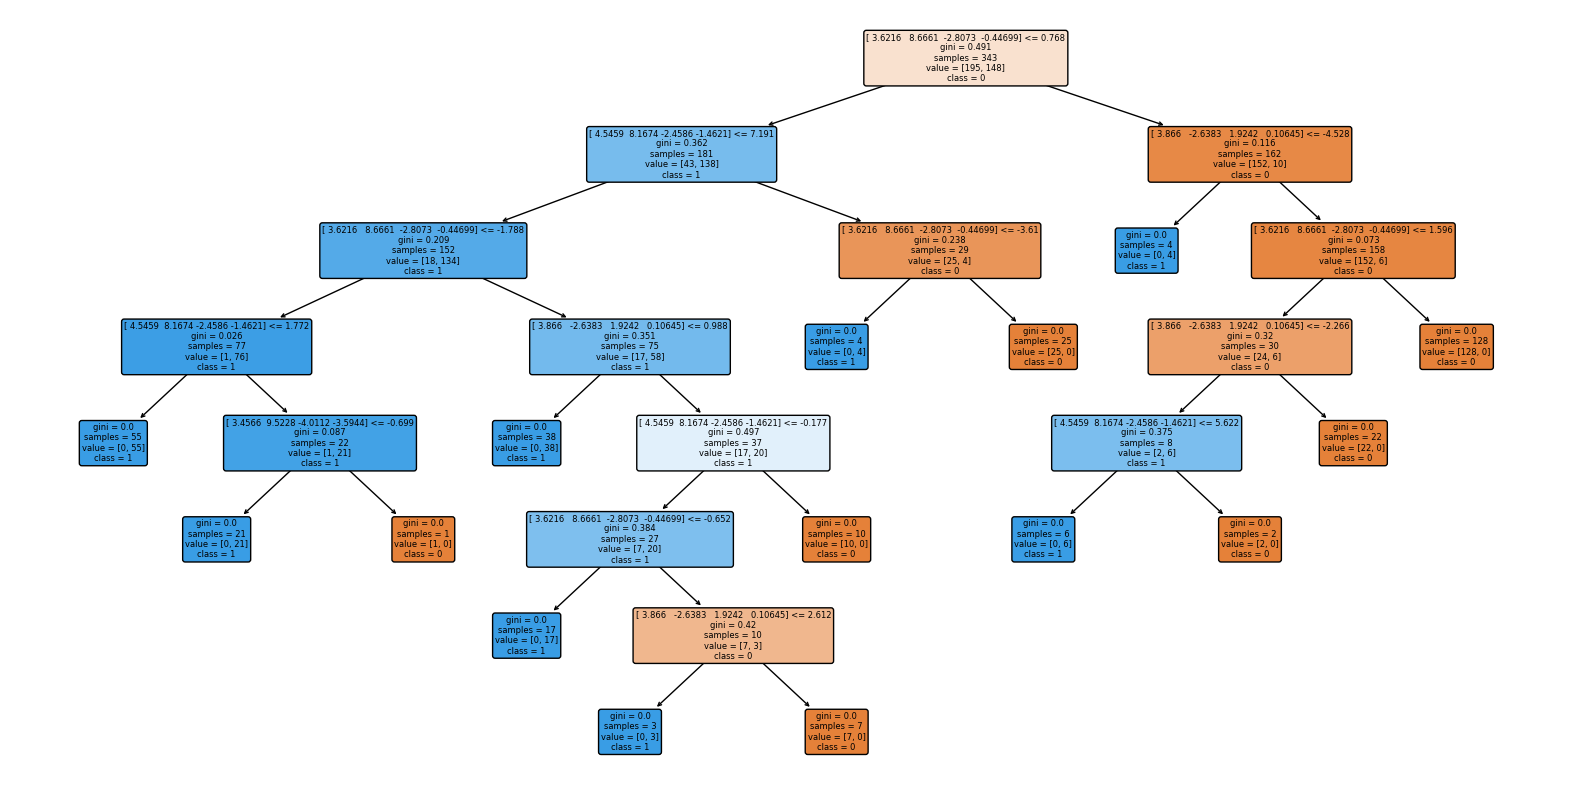

AUC Valid = 96.35 , Size of Tree = 29 , random split size=  215


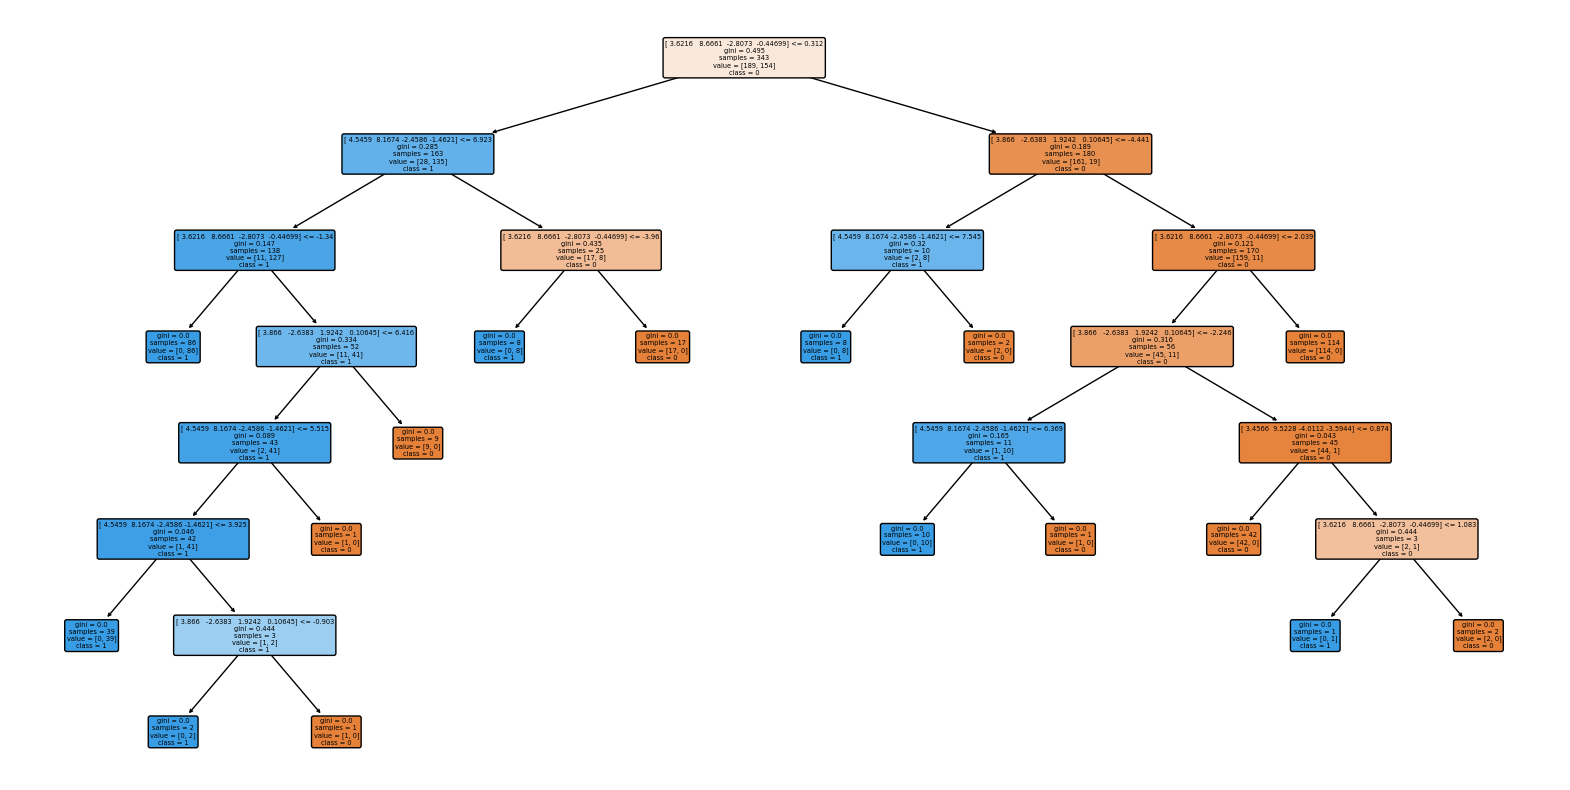

AUC Valid = 97.07 , Size of Tree = 31 , random split size=  424


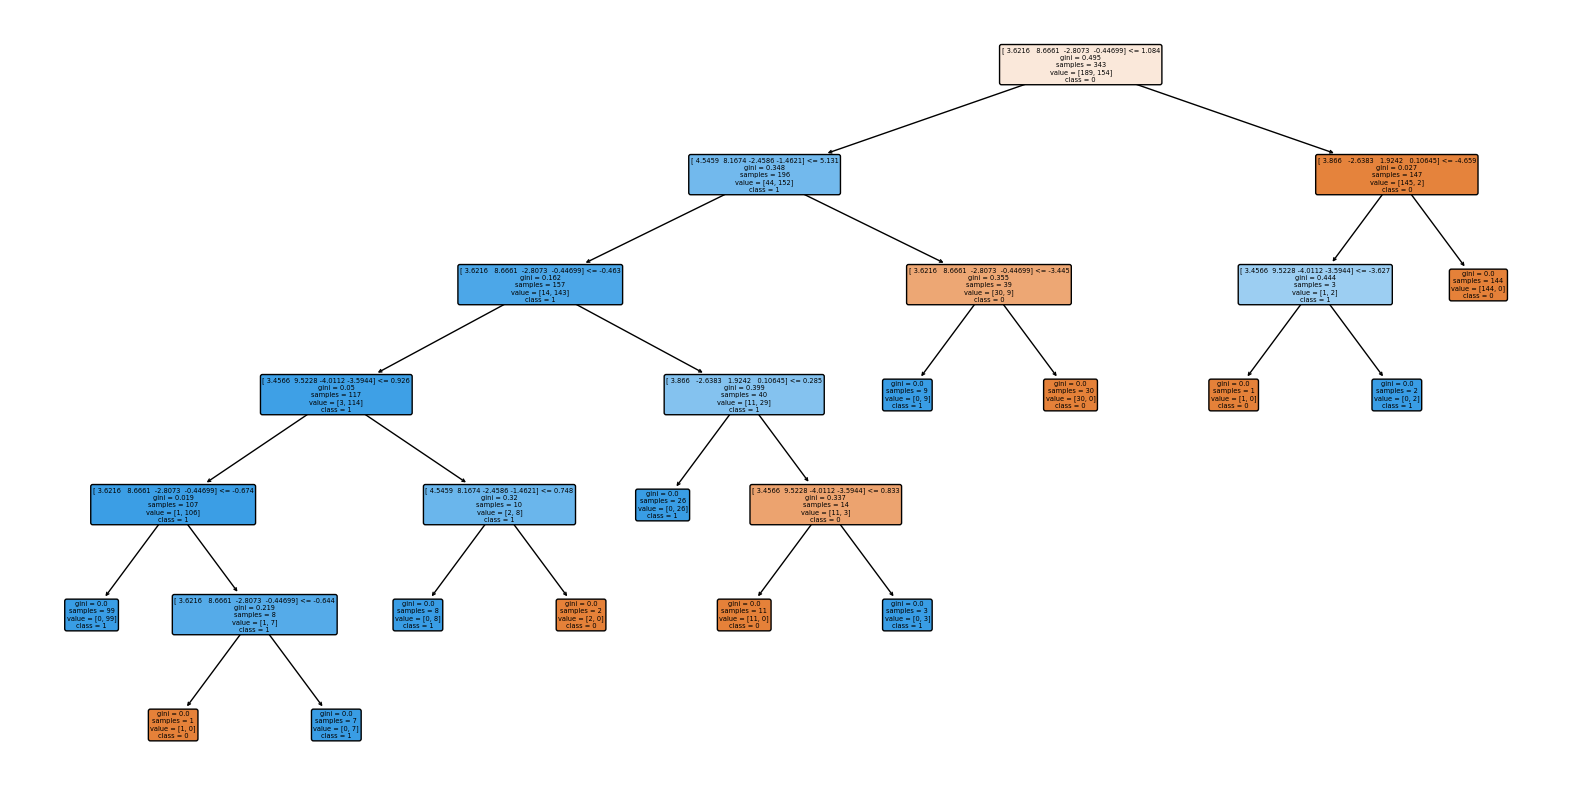

AUC Valid = 95.99 , Size of Tree = 25 , random split size=  358


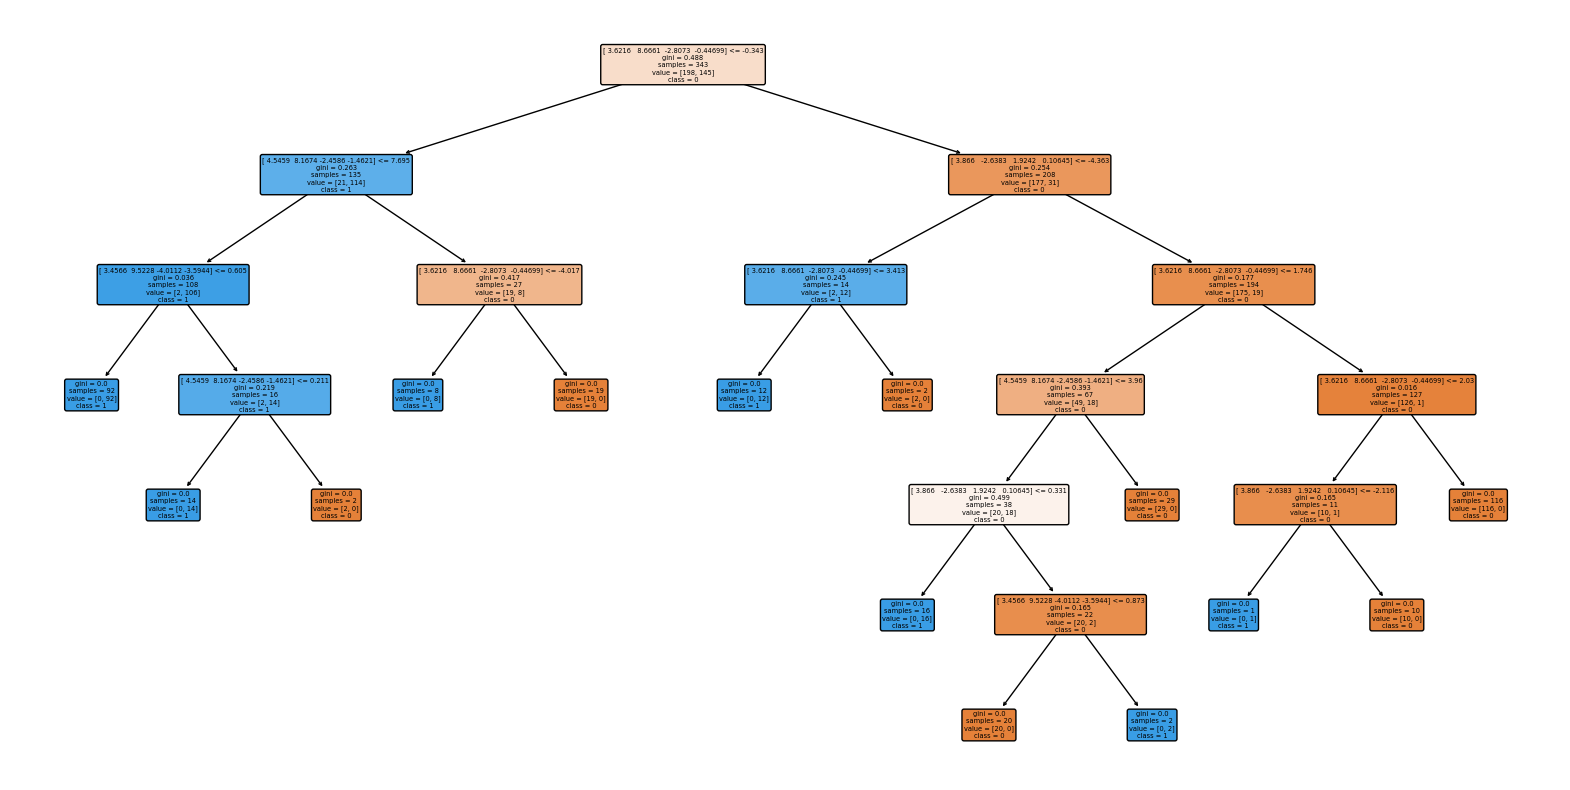

AUC Valid = 97.44 , Size of Tree = 27 , random split size=  569


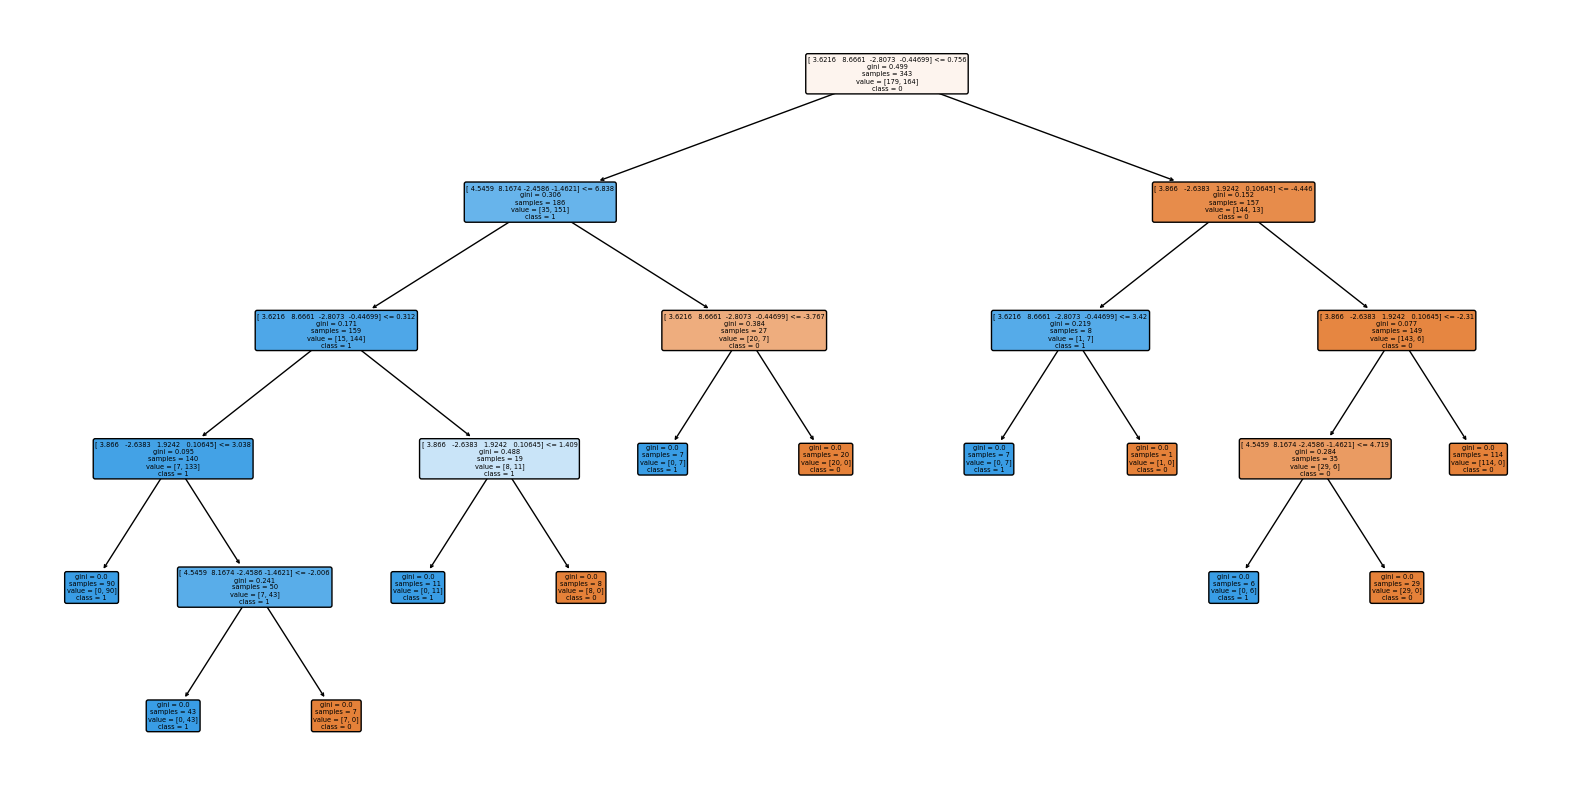

AUC Valid = 96.91 , Size of Tree = 23 , random split size=  264


In [5]:
Accuracy = []
sizeOfTree = []
randomState = []

for i in range(5):
    random_var = random.randint(50, 600)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.75,random_state= random_var)
    X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

    model_tree = DecisionTreeClassifier()
    model_tree.fit(X_train, y_train)

    #y_train_pred = model_tree.predict(X_train)
    y_valid_pred = model_tree.predict(X_valid)
    #auc_train = metrics.roc_auc_score(y_train, y_train_pred)
    auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)
    
    from sklearn.tree import plot_tree

    #Create the figure
    plt.figure(figsize=(20,10))

    #Create the tree plot
    plot_tree(model_tree,
            feature_names = X, #Feature names
            class_names = ["0","1"], #Class names
             rounded = True,
             filled = True)

    plt.show()
    
    print("AUC Valid = {} , Size of Tree = {}".format(round(auc_valid*100,2),model_tree.tree_.node_count), ", random split size= ",random_var)
    Accuracy.append(round(auc_valid*100,2))
    sizeOfTree.append(model_tree.tree_.node_count)
    randomState.append(random_var)

## Create Report Table

In [6]:
df = pd.DataFrame ({'Accuracy': Accuracy,'Tree Size':sizeOfTree,'Random_State':randomState })
df

Accuracy  Tree Size  Random_State
0     96.35         29           215
1     97.07         31           424
2     95.99         25           358
3     97.44         27           569
4     96.91         23           264

# Experiment(2)

## Splitting the Data where training set sizes in the range [ 30% - 70%]

In Case Of Train Size = 0.3


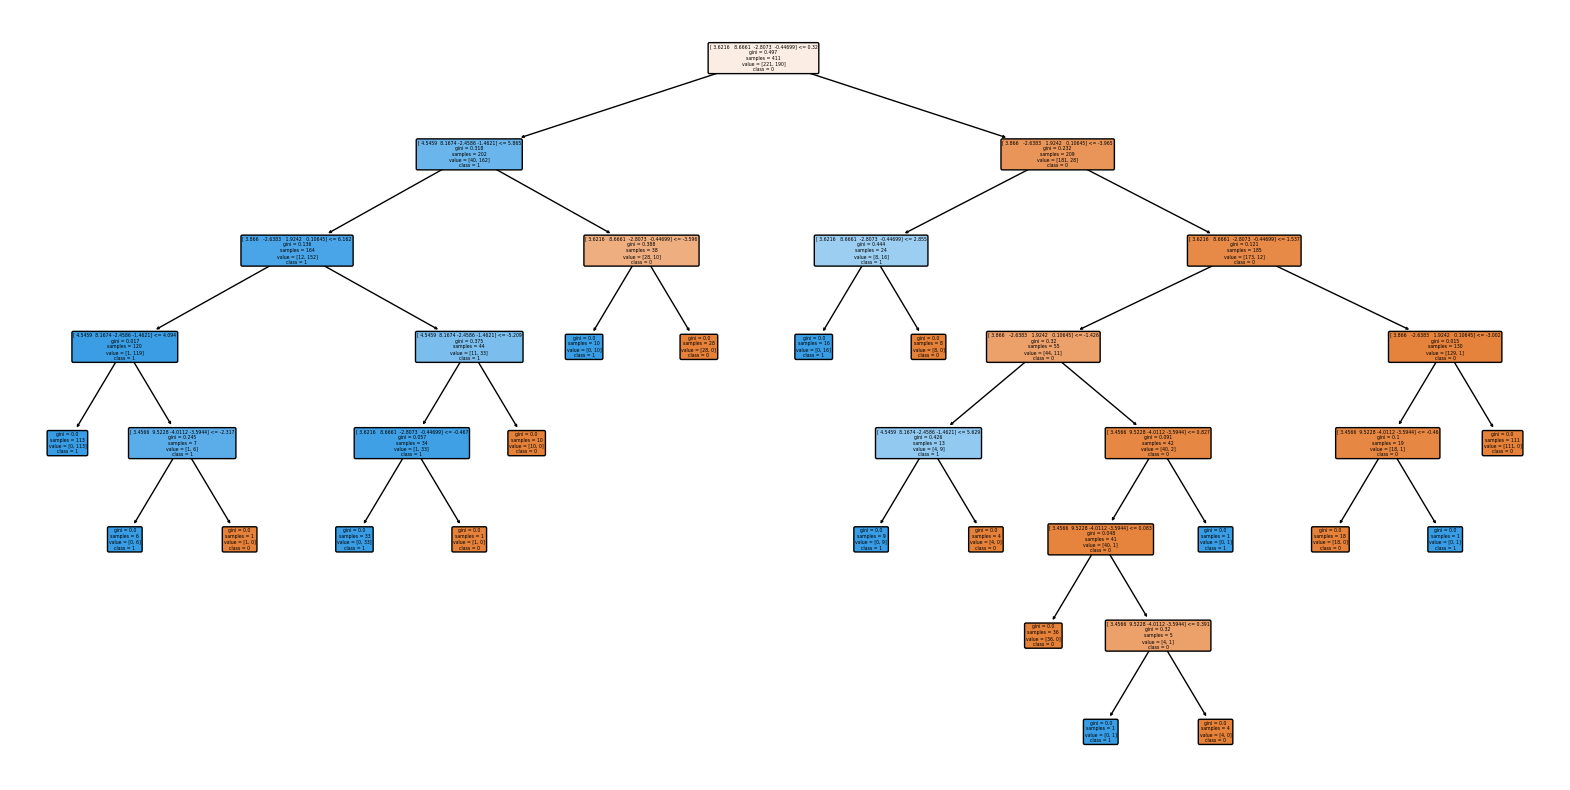

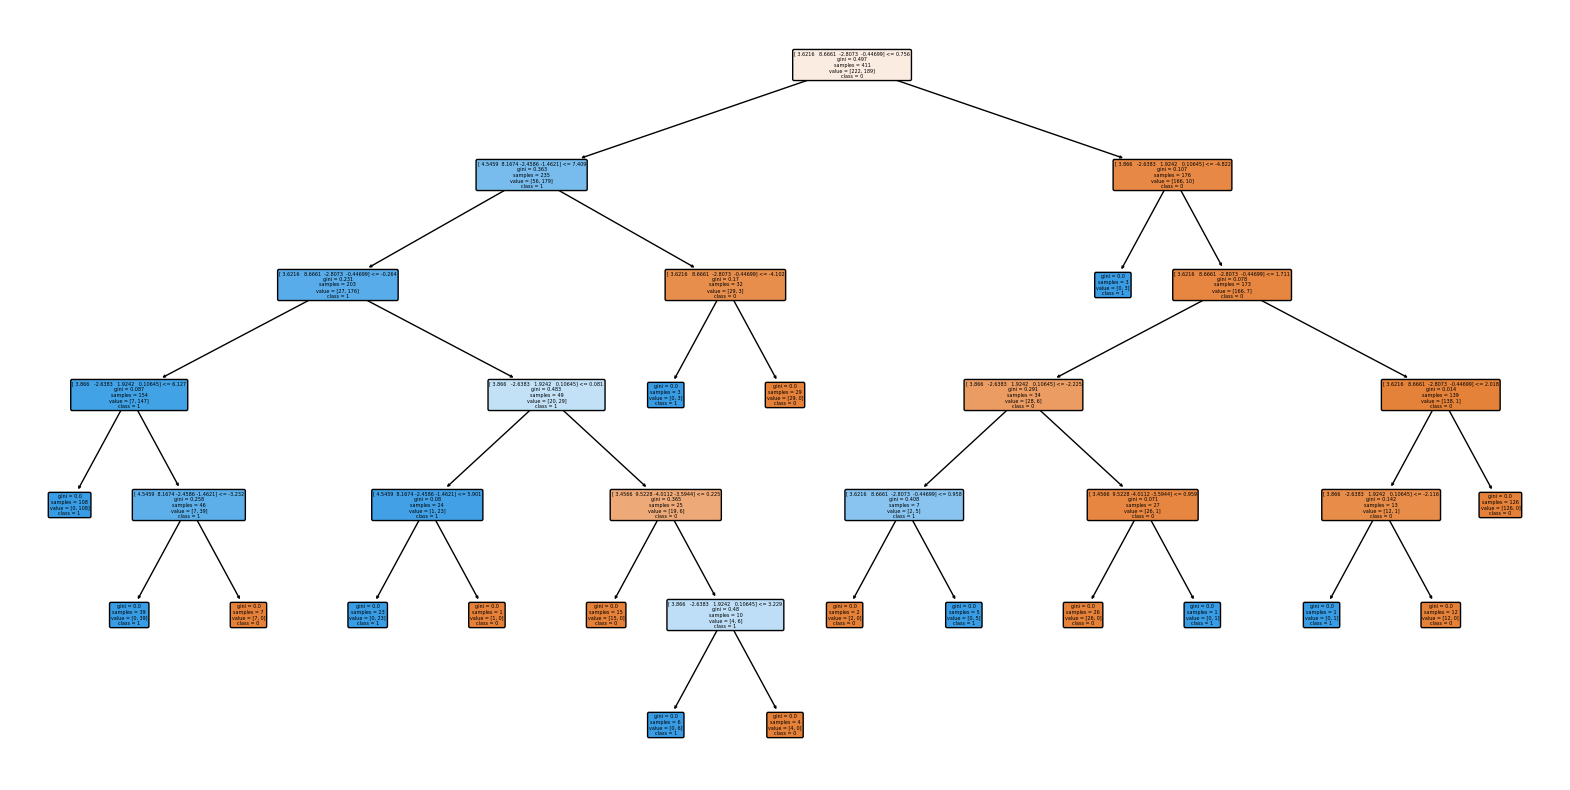

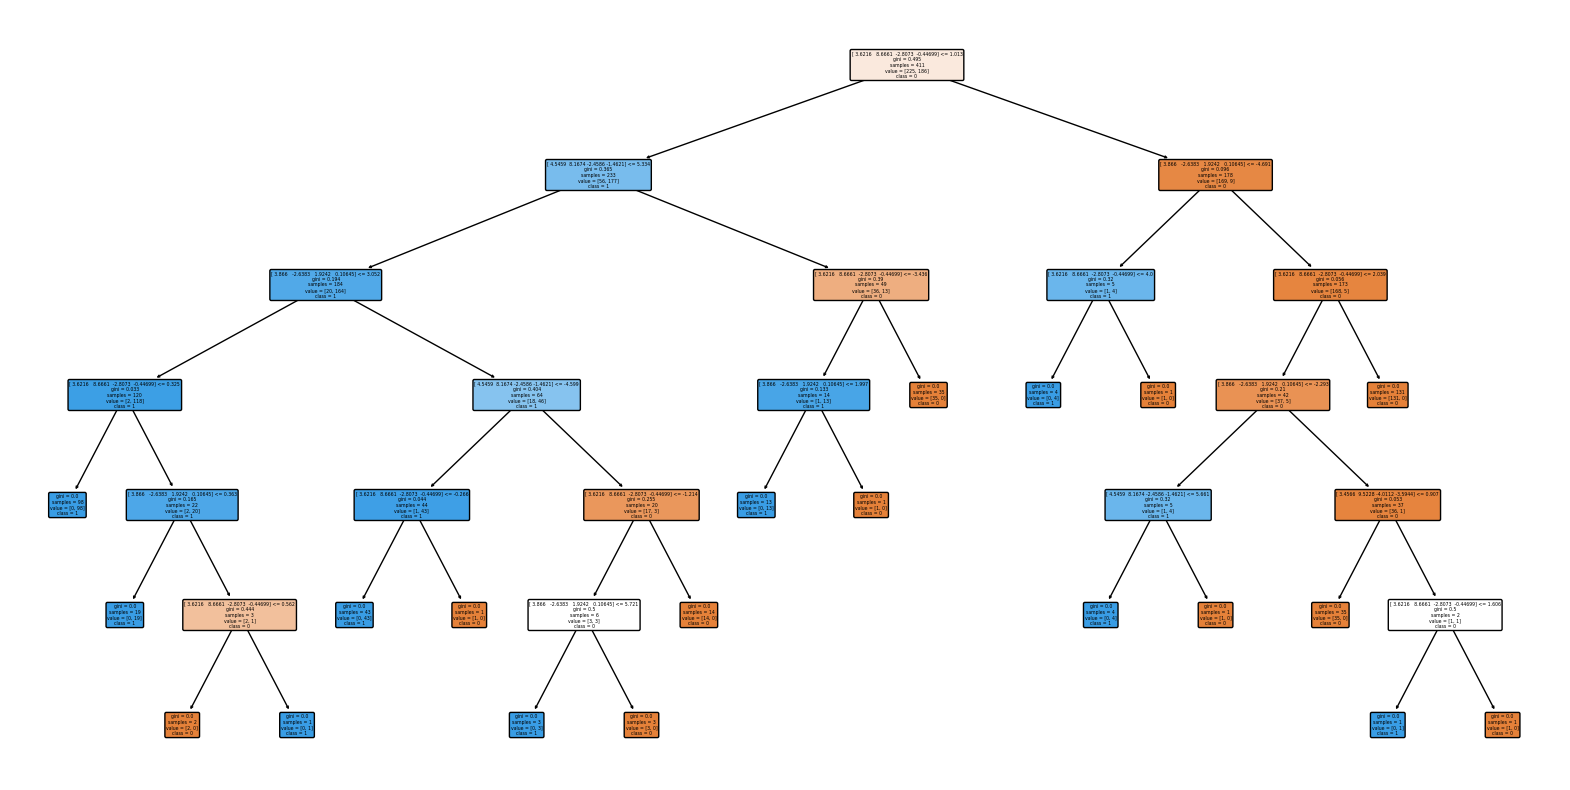

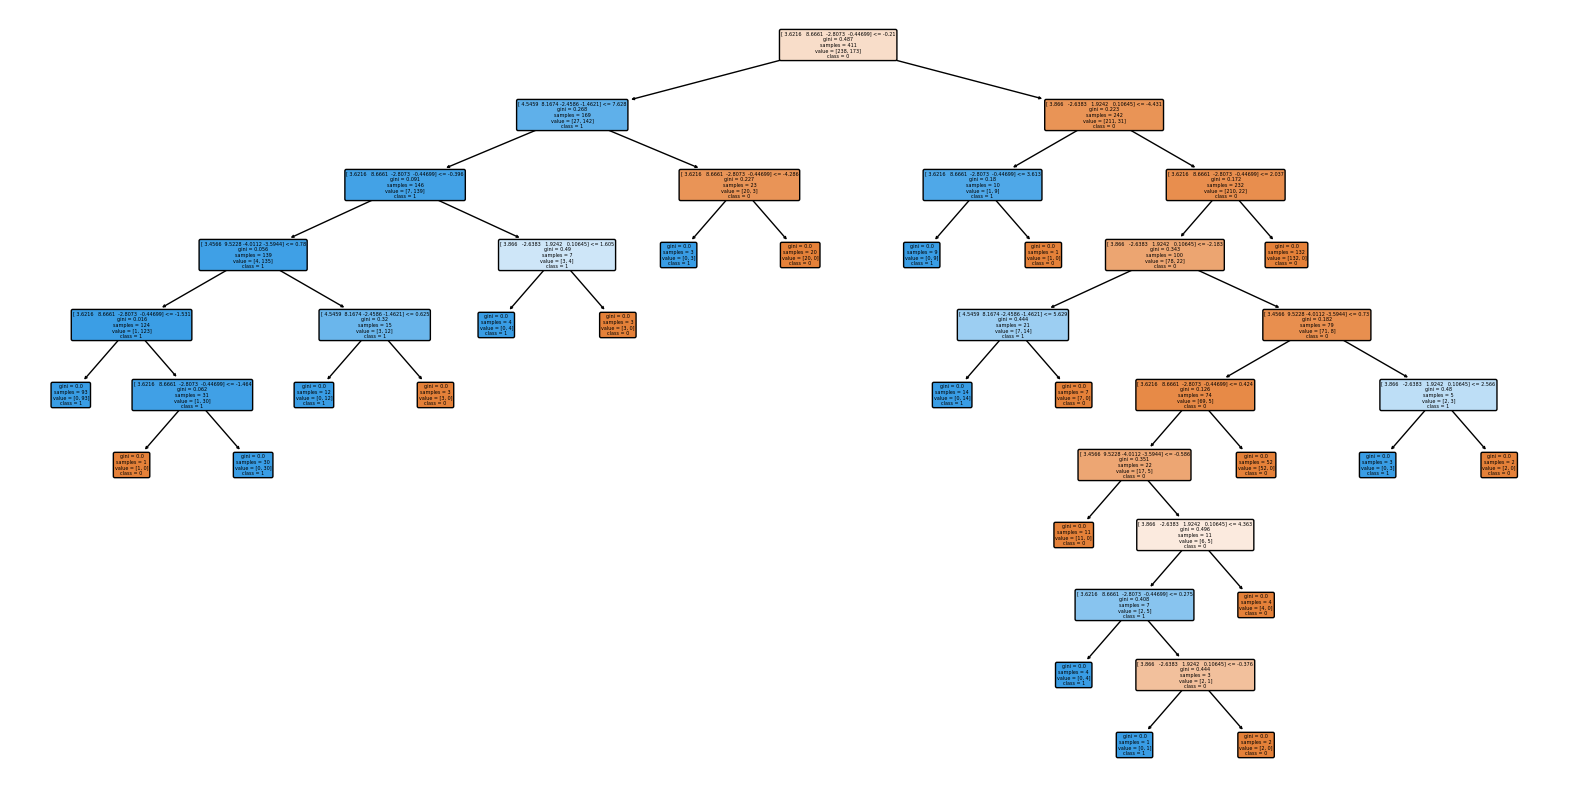

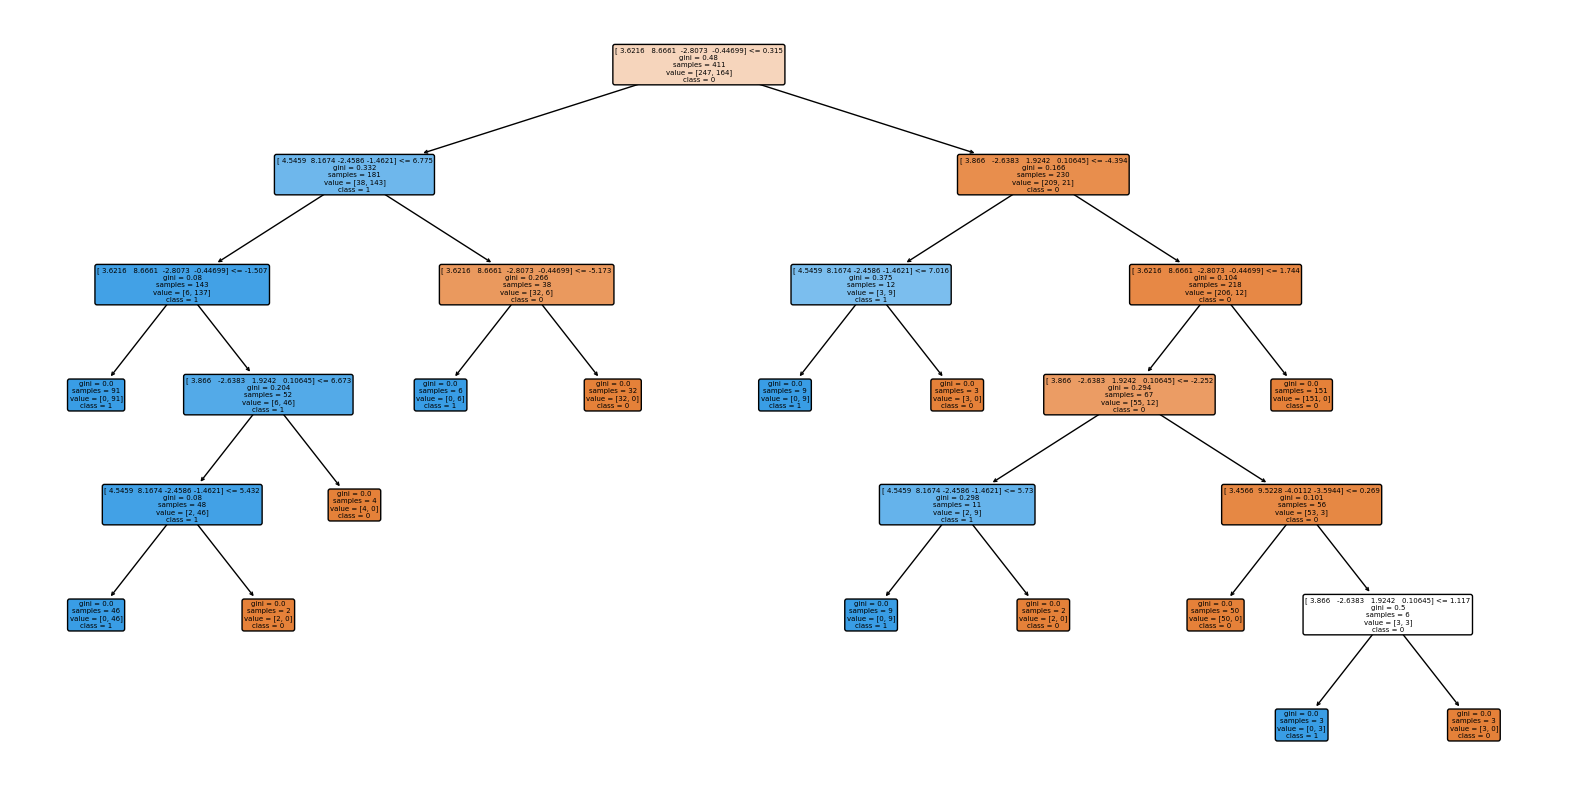

Min Auc = 96.91 , Max Auc = 98.22 , Mean Auc = 97.41
Min Node = 27 , Max Node = 43 , Mean Node = 36.2

In Case Of Train Size = 0.4


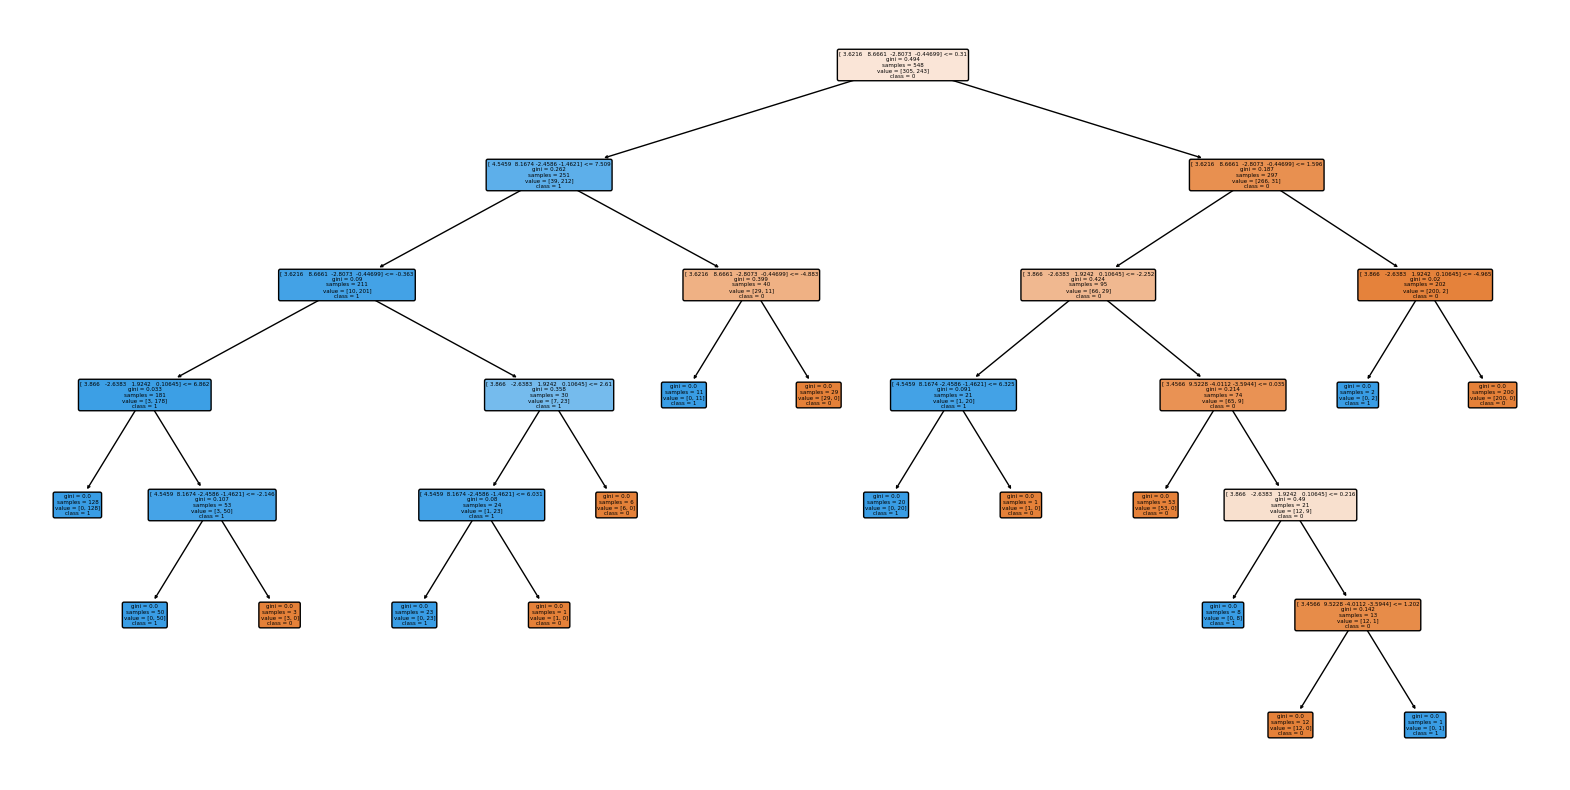

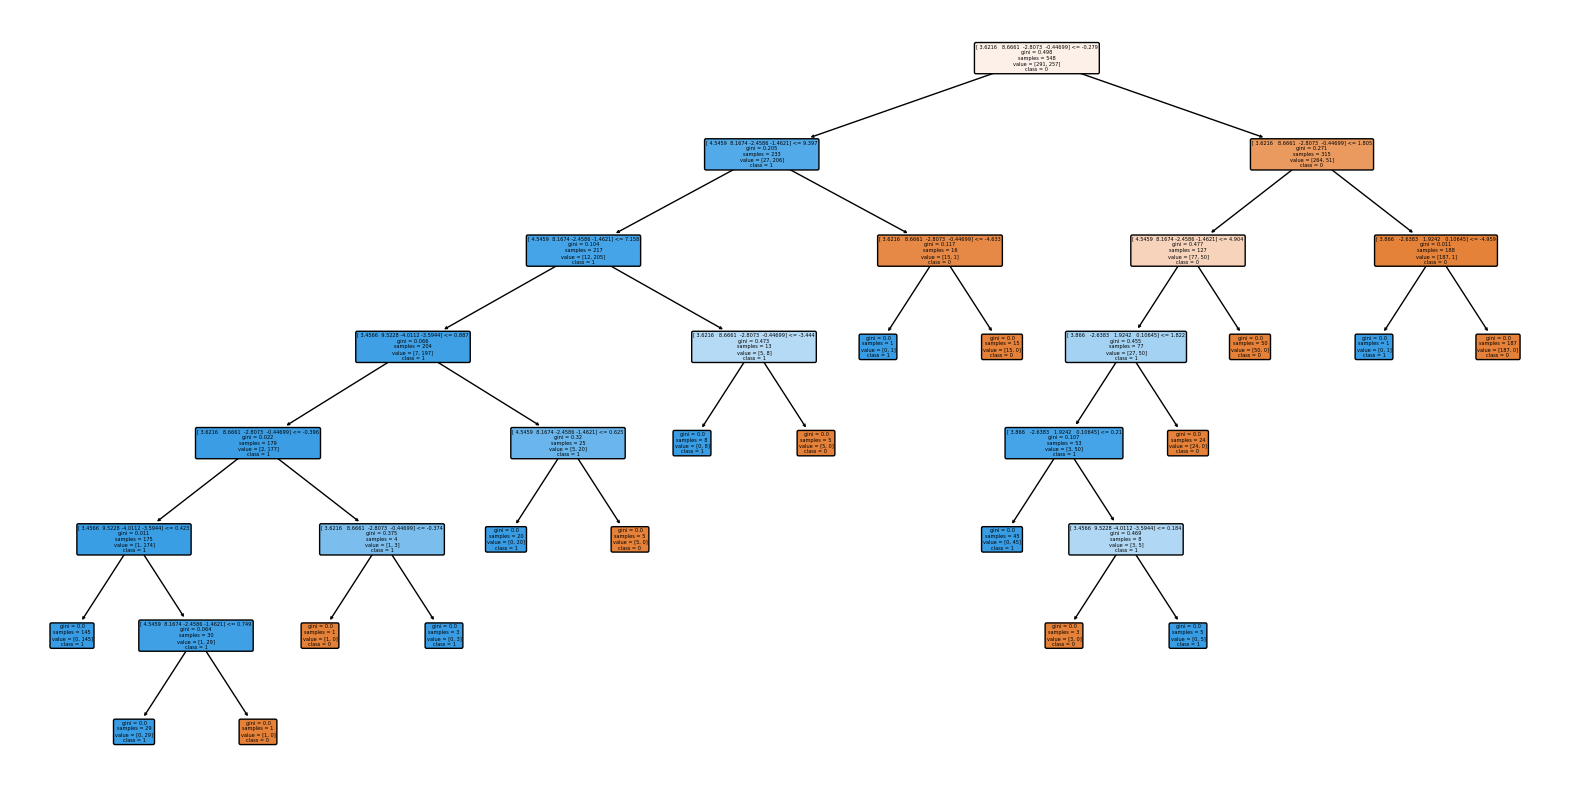

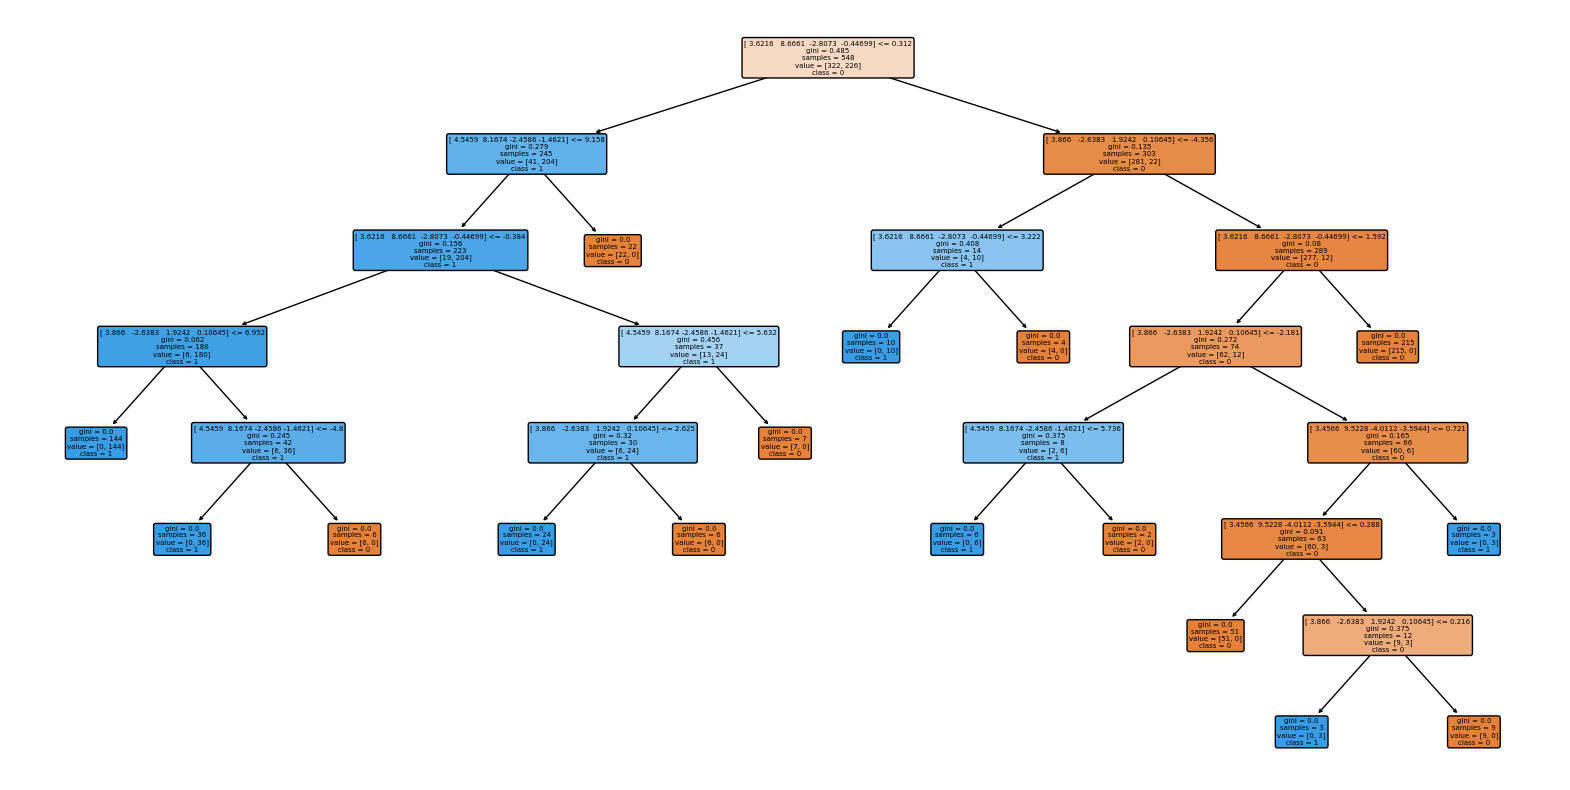

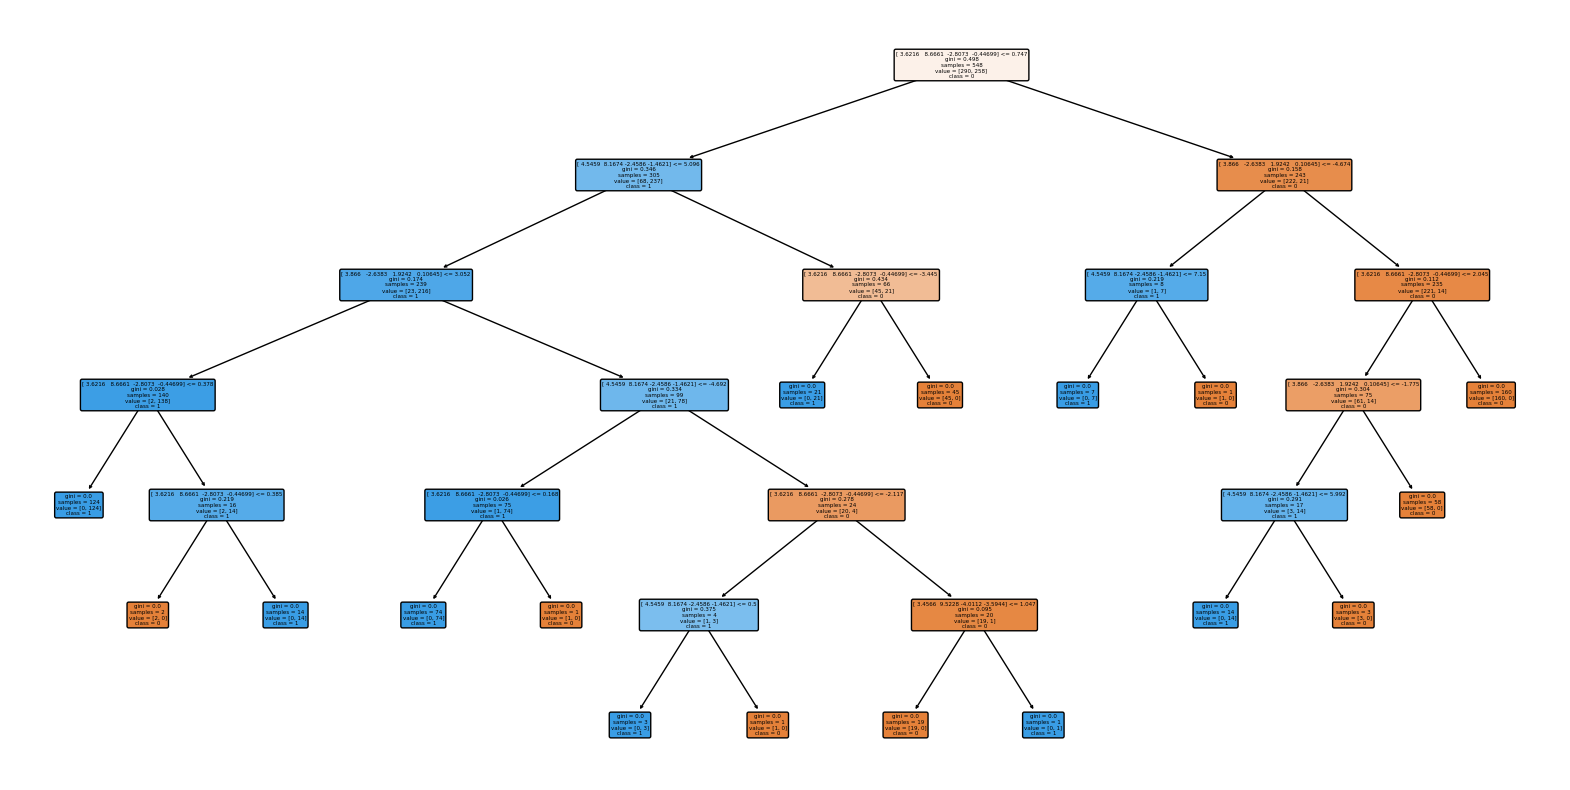

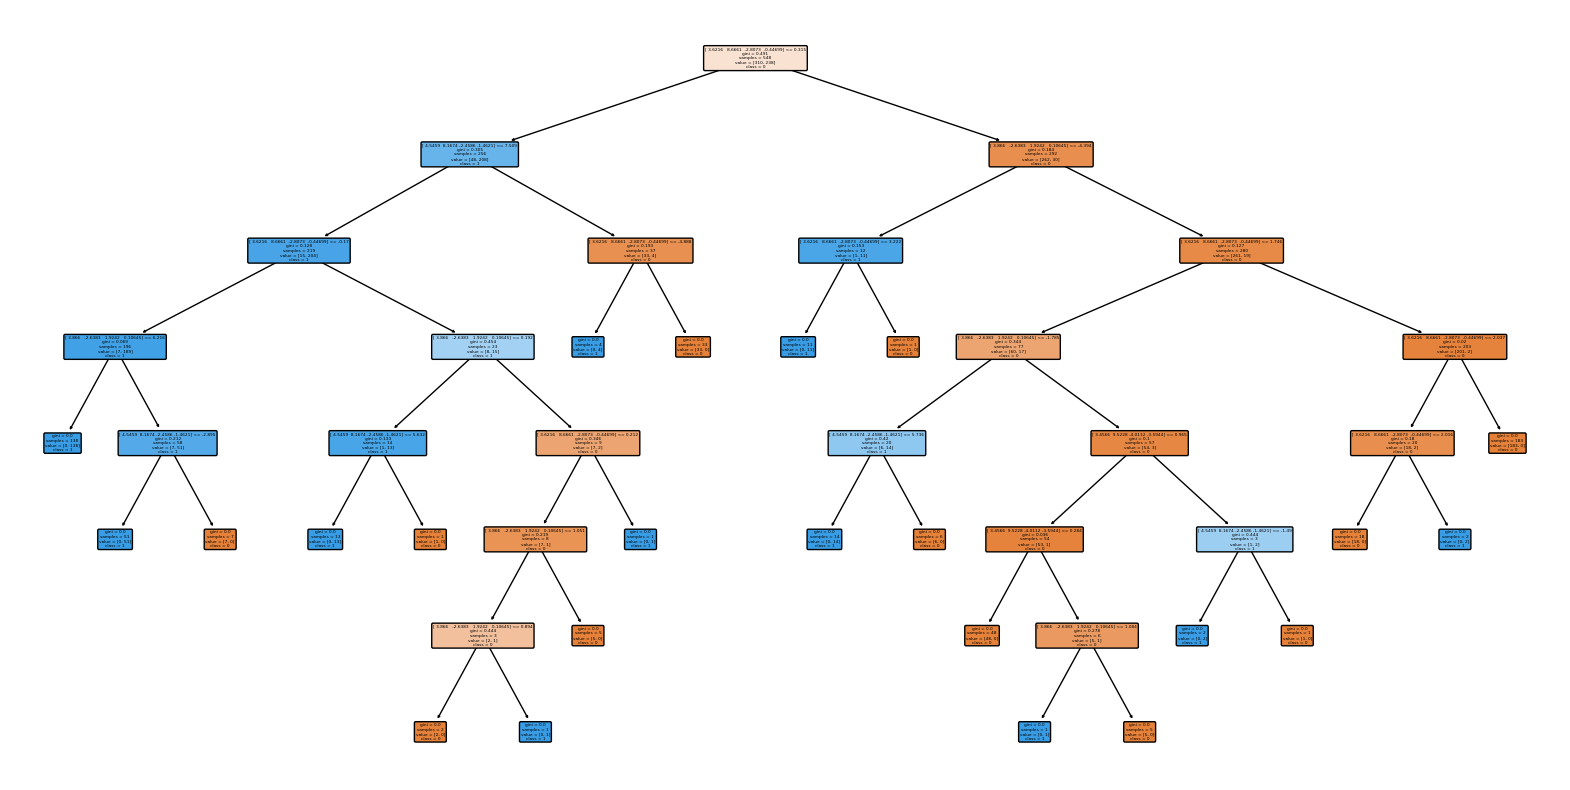

Min Auc = 96.36 , Max Auc = 98.19 , Mean Auc = 97.6
Min Node = 31 , Max Node = 45 , Mean Node = 35.0

In Case Of Train Size = 0.5


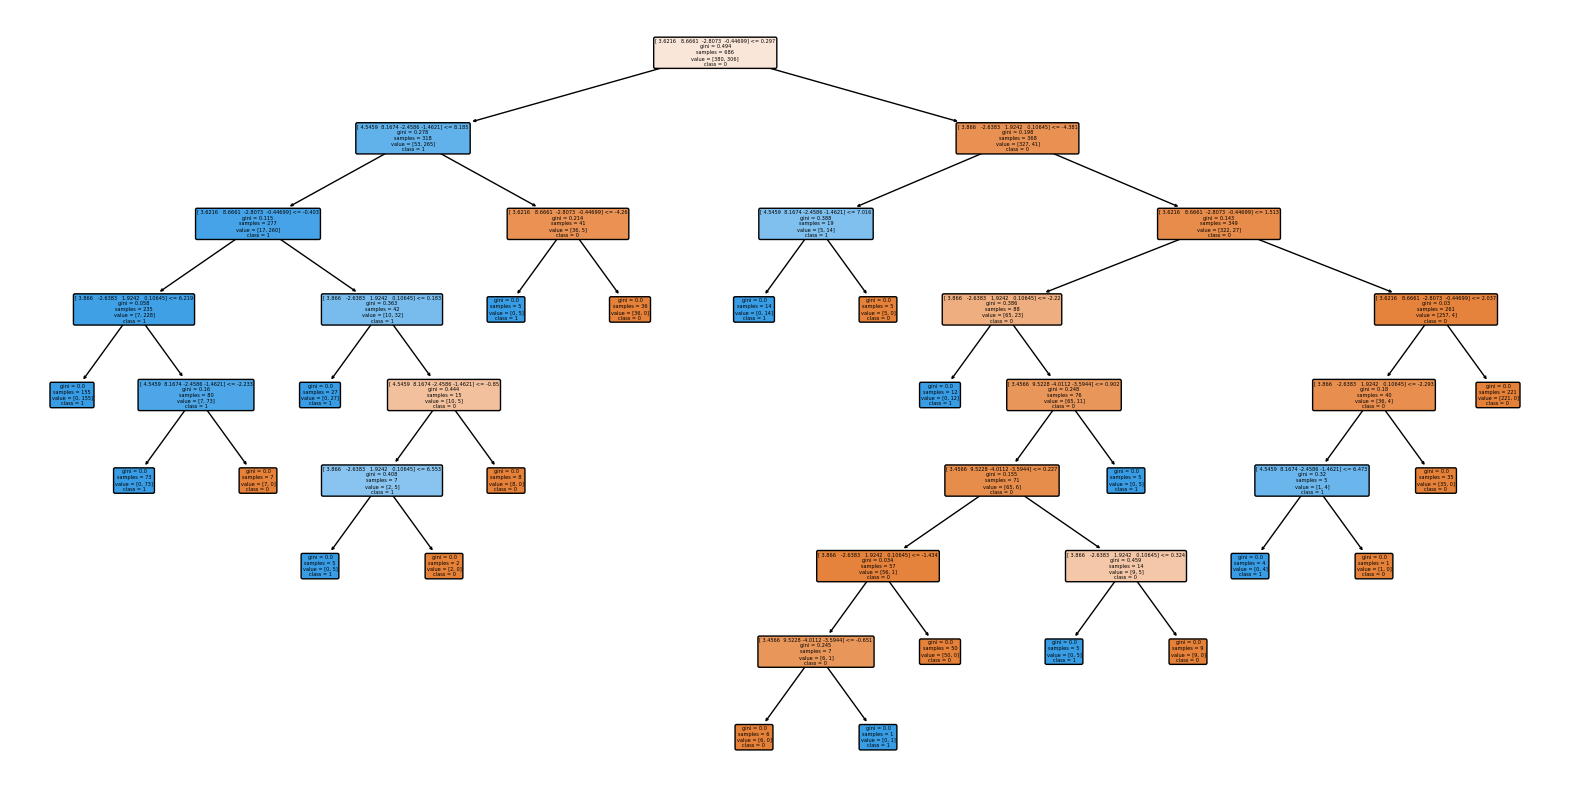

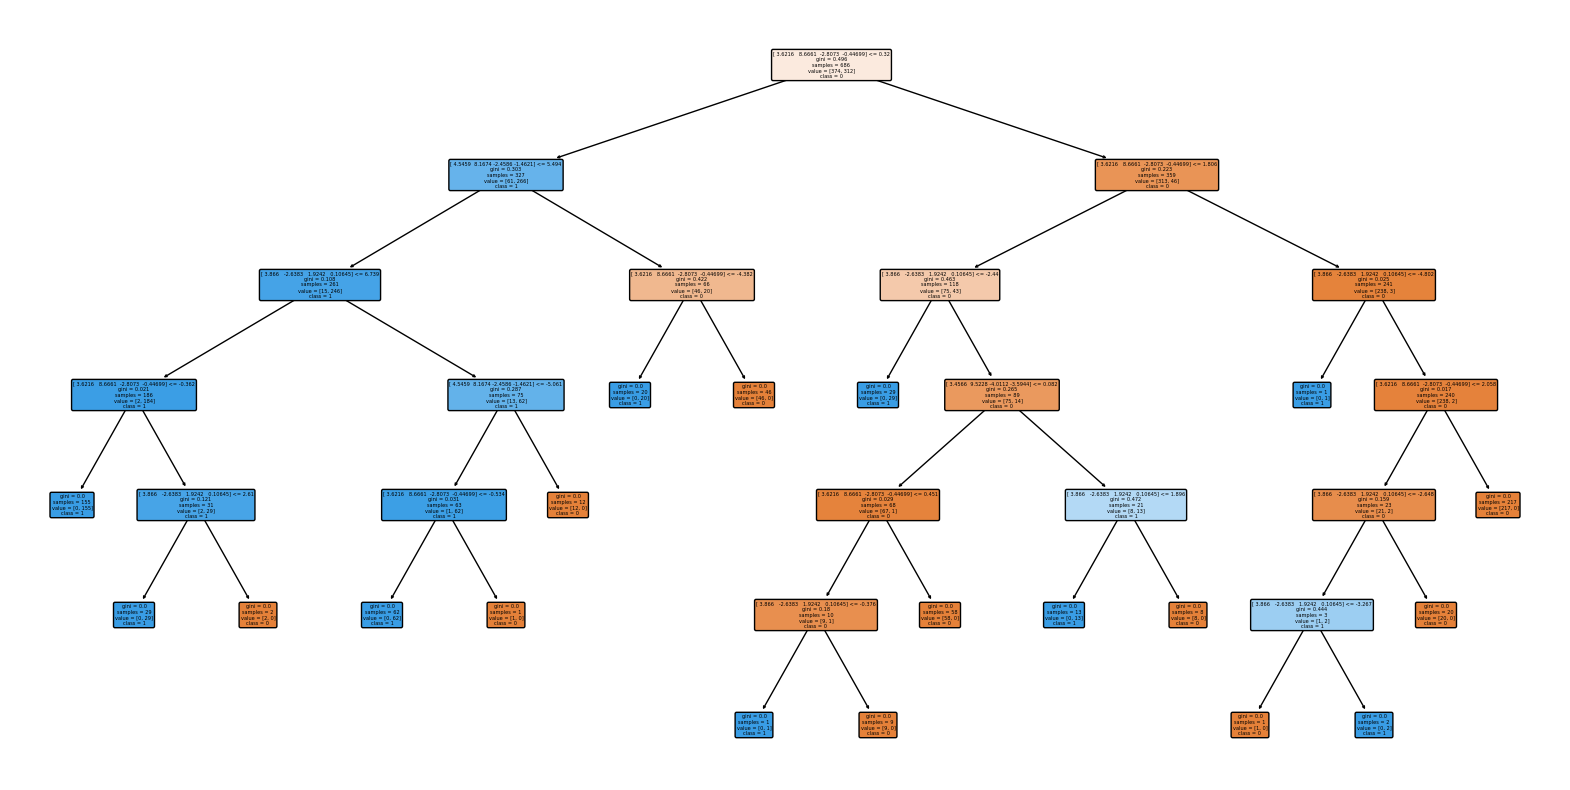

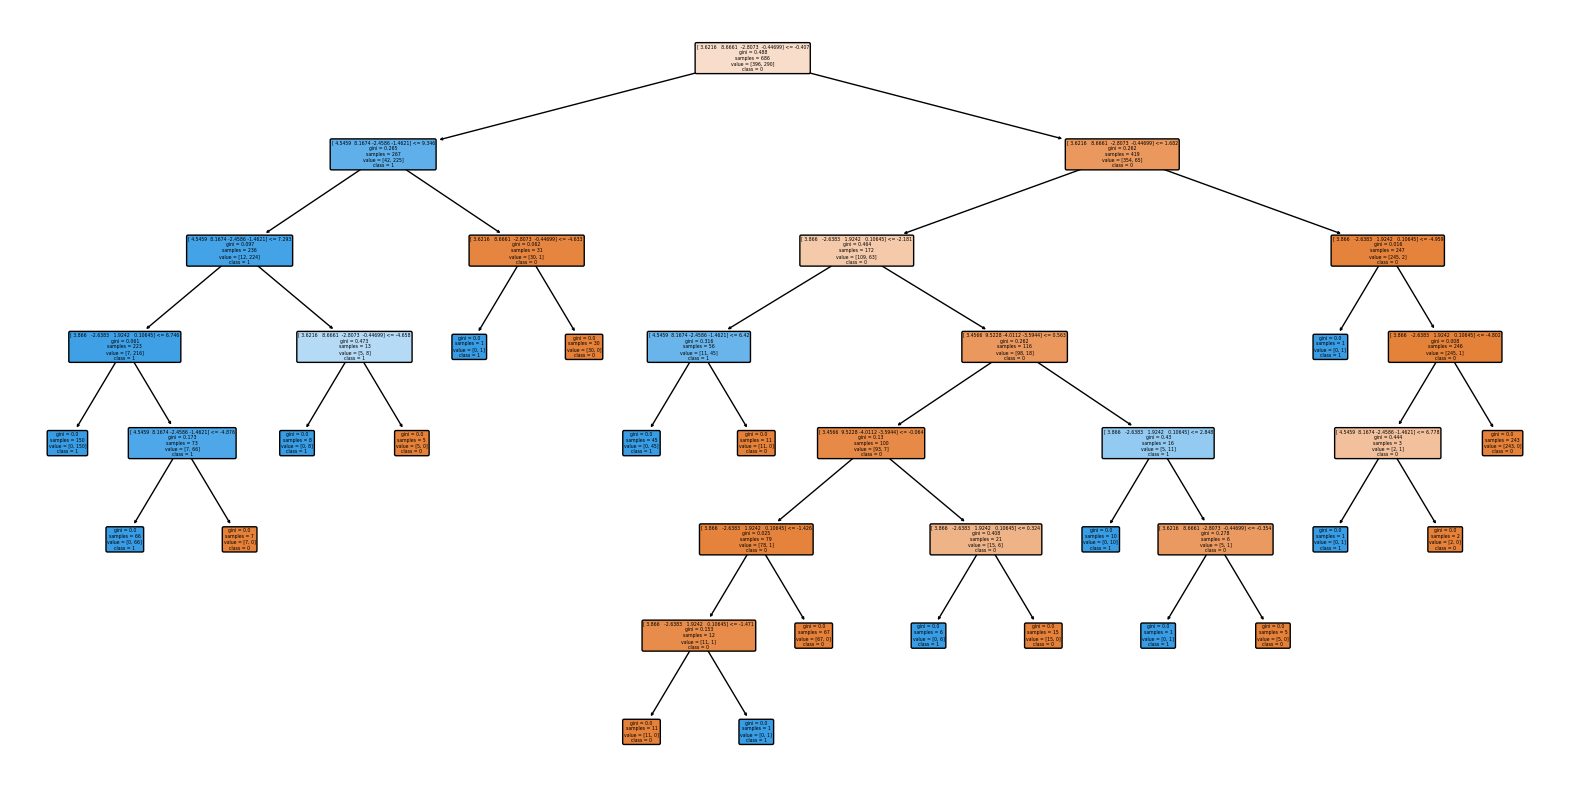

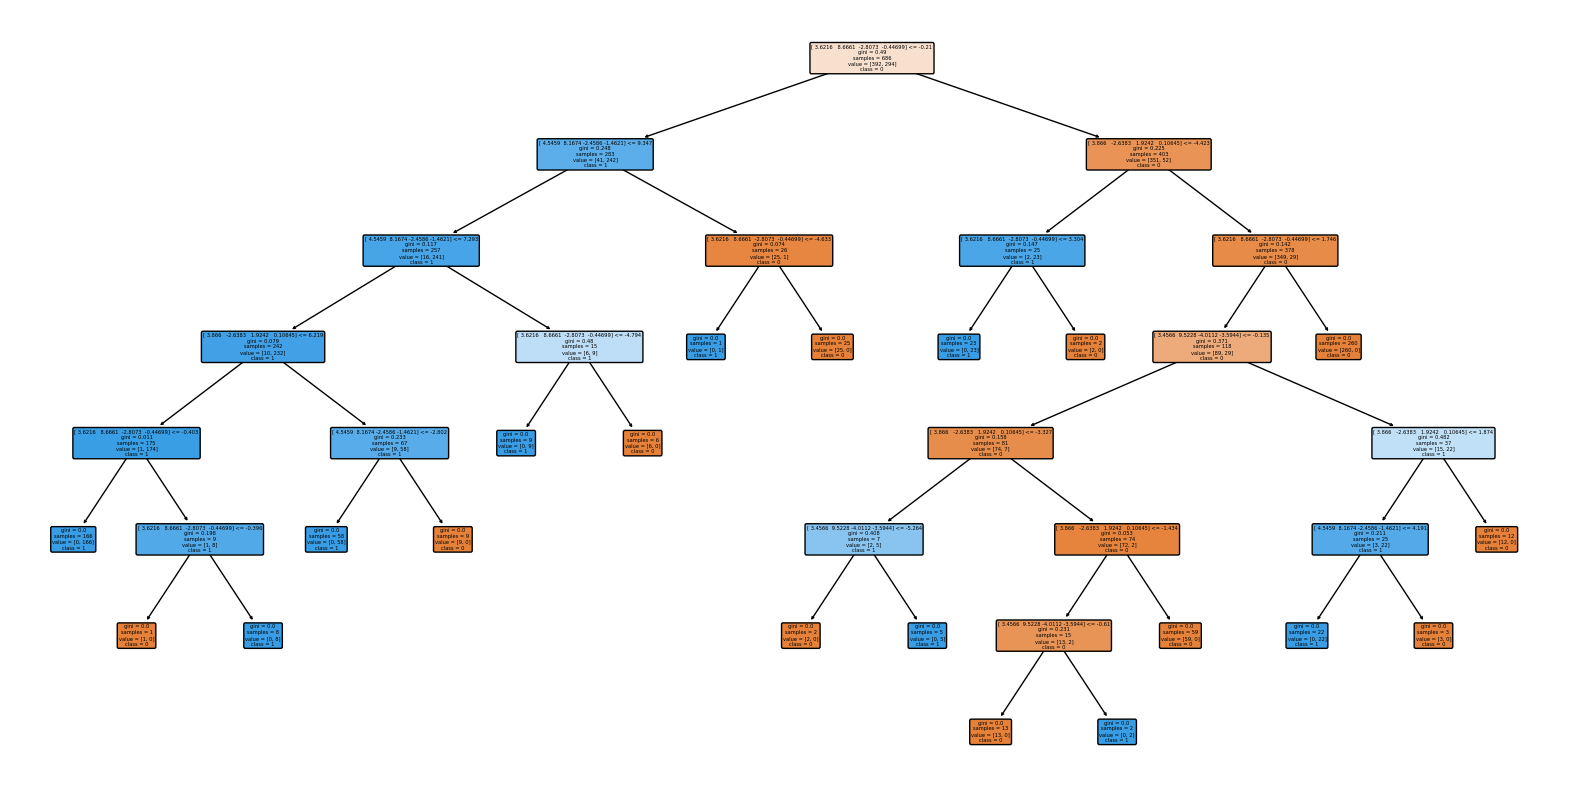

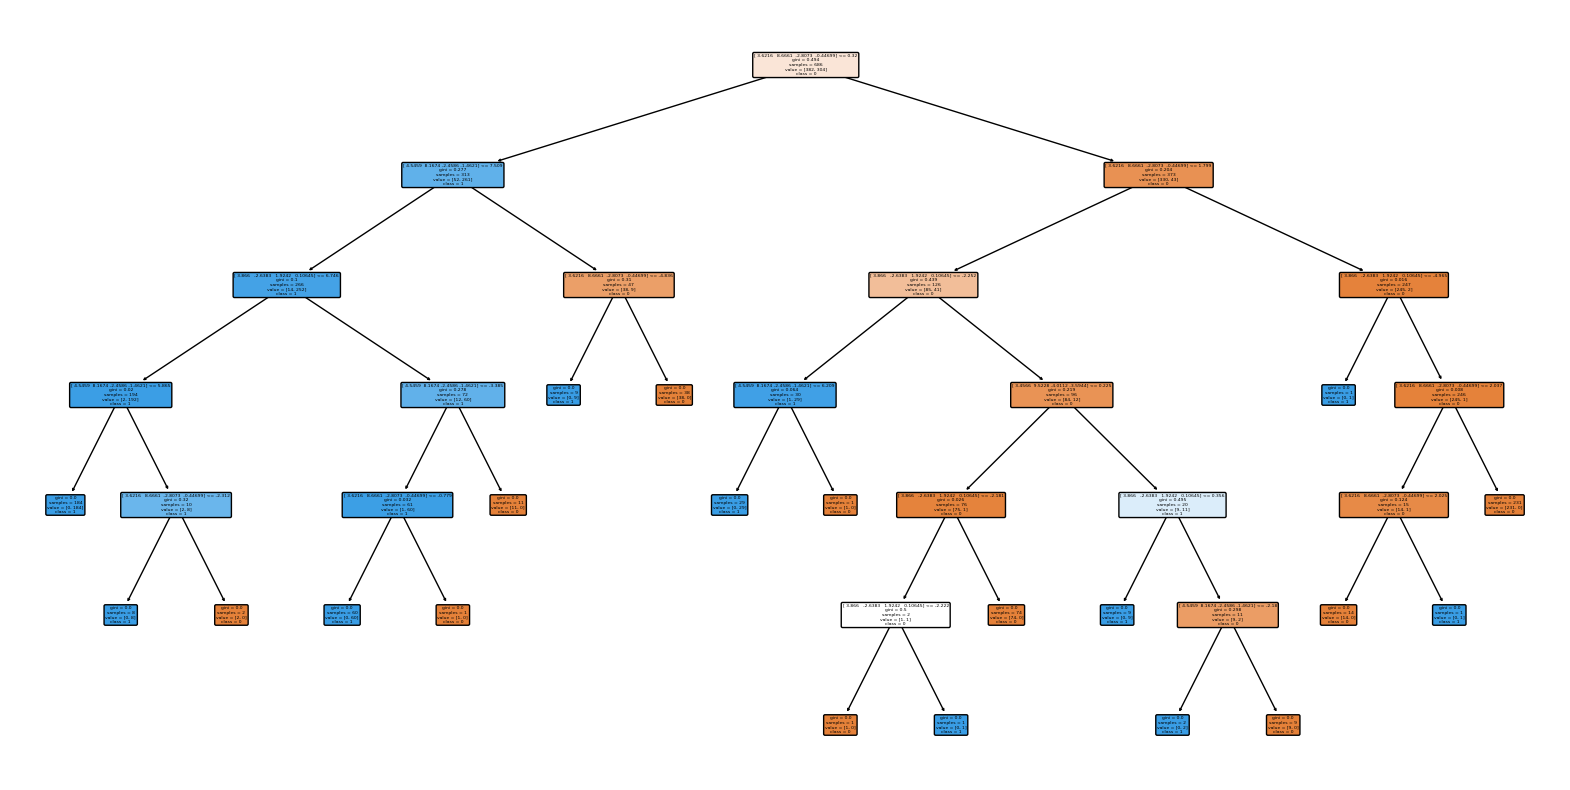

Min Auc = 97.48 , Max Auc = 98.66 , Mean Auc = 97.95
Min Node = 37 , Max Node = 43 , Mean Node = 39.8

In Case Of Train Size = 0.6


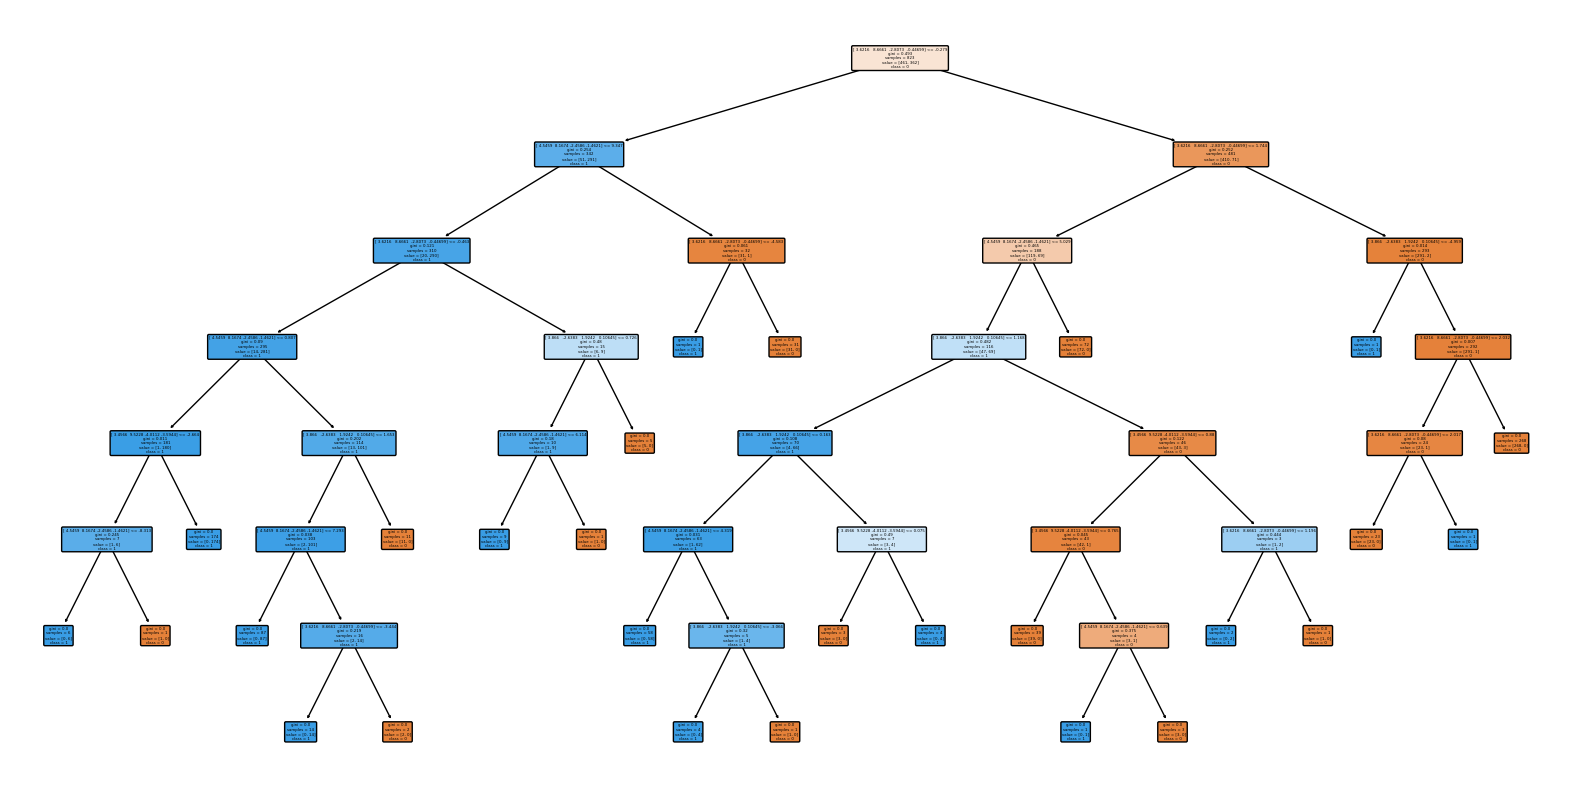

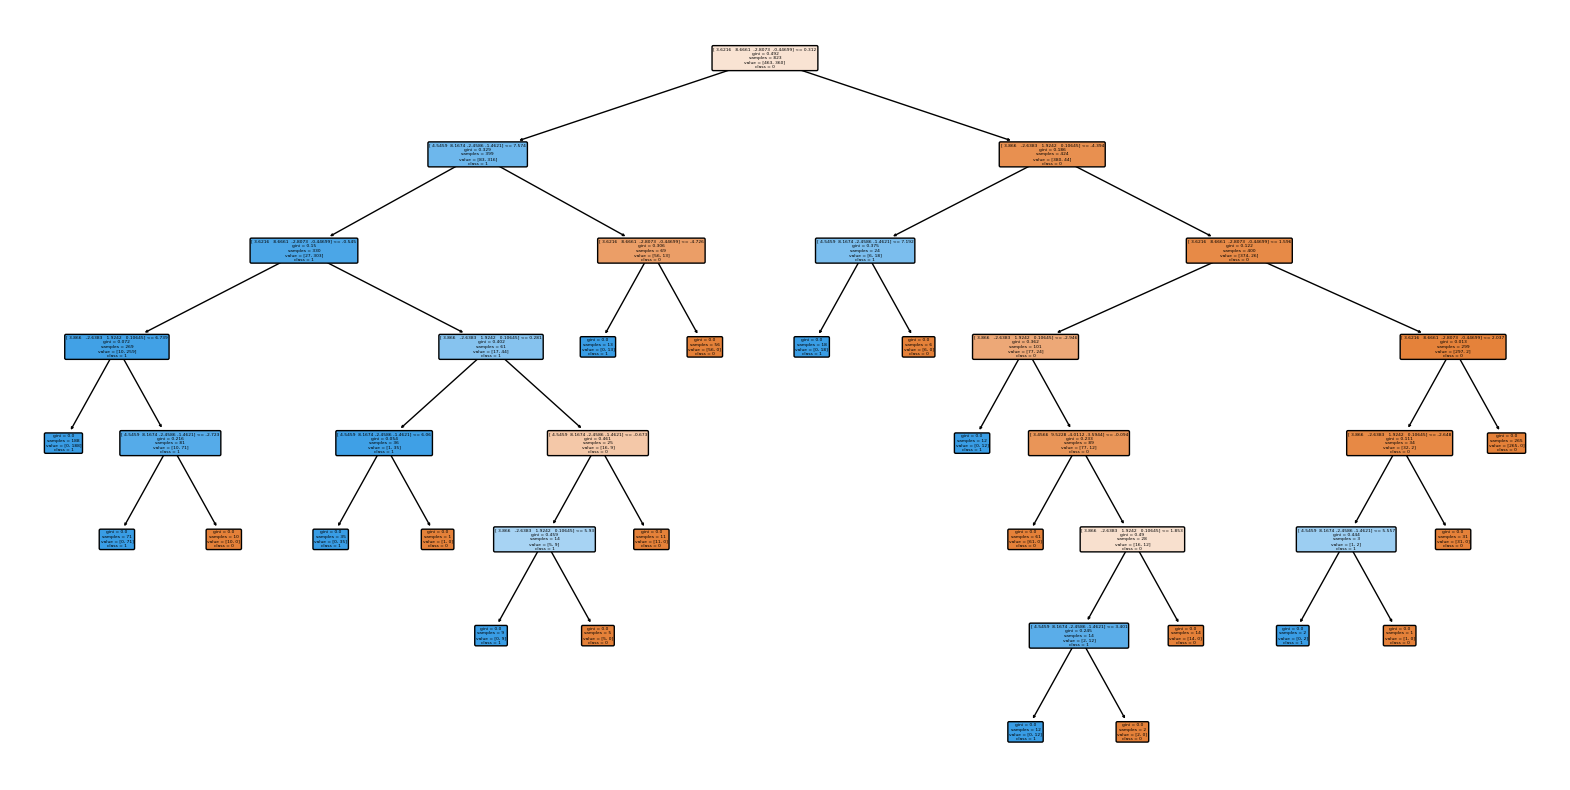

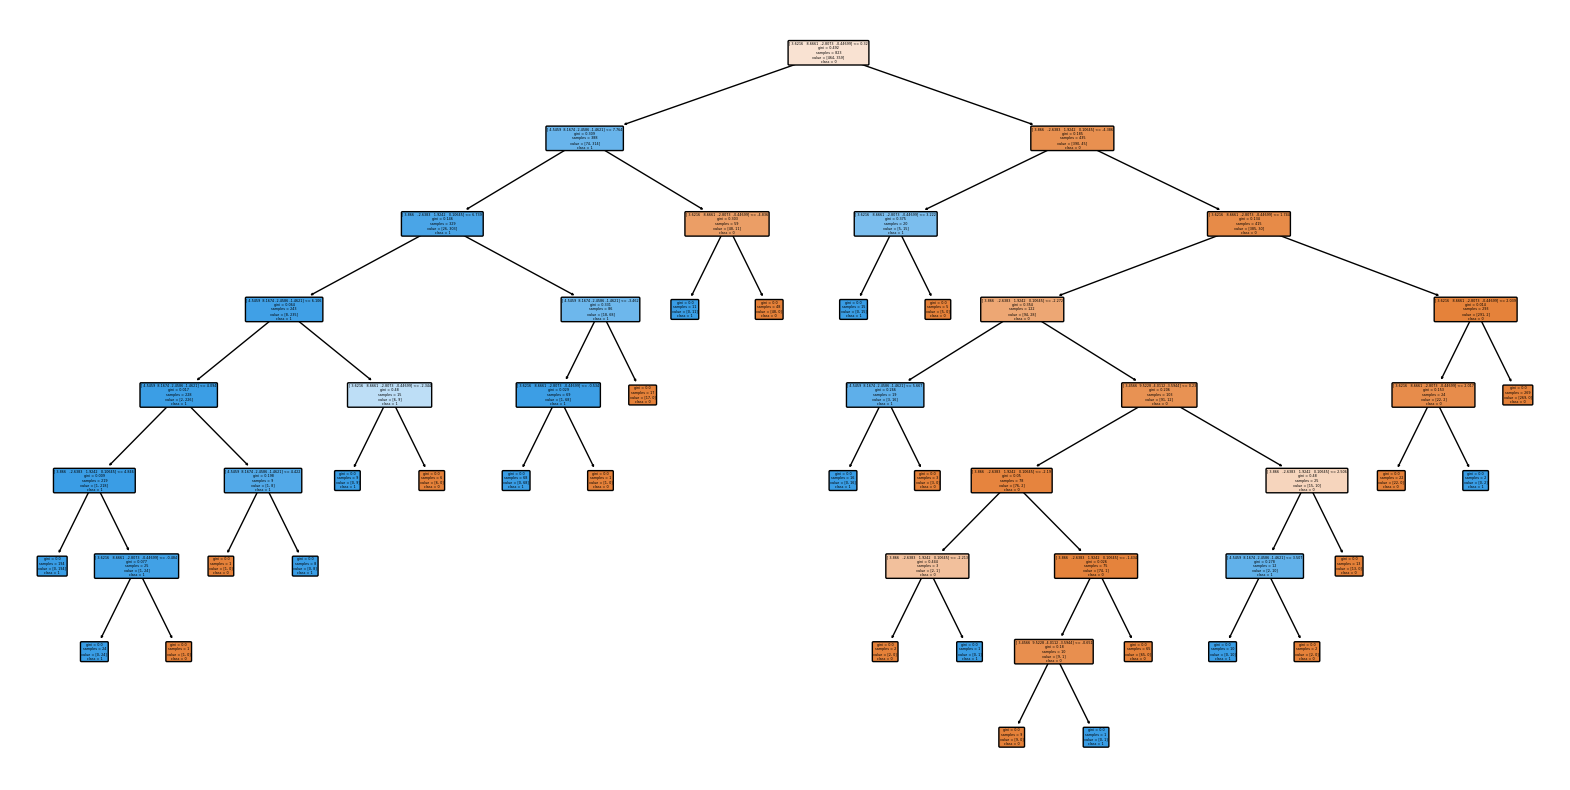

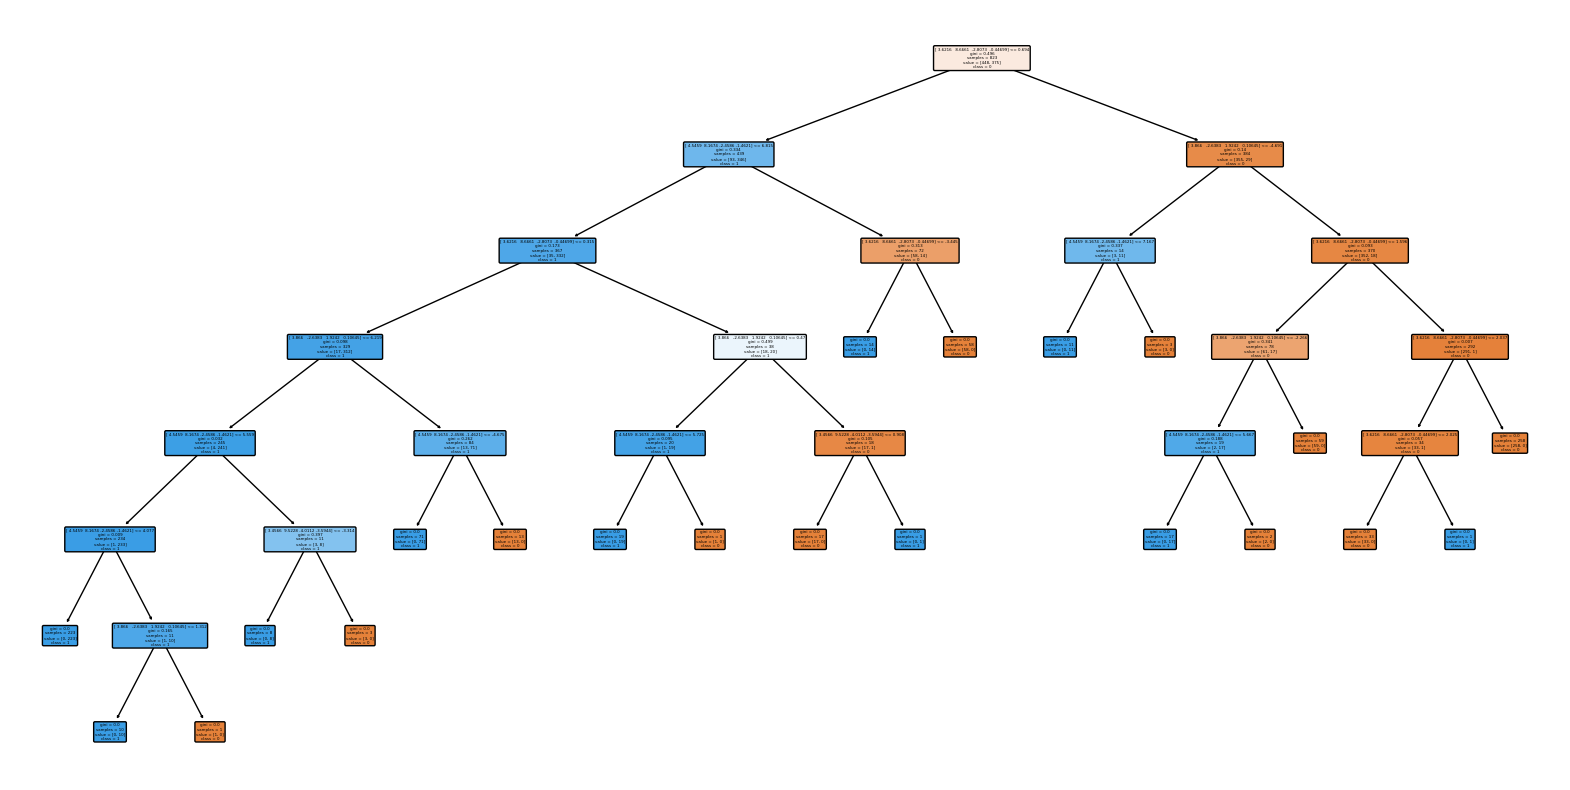

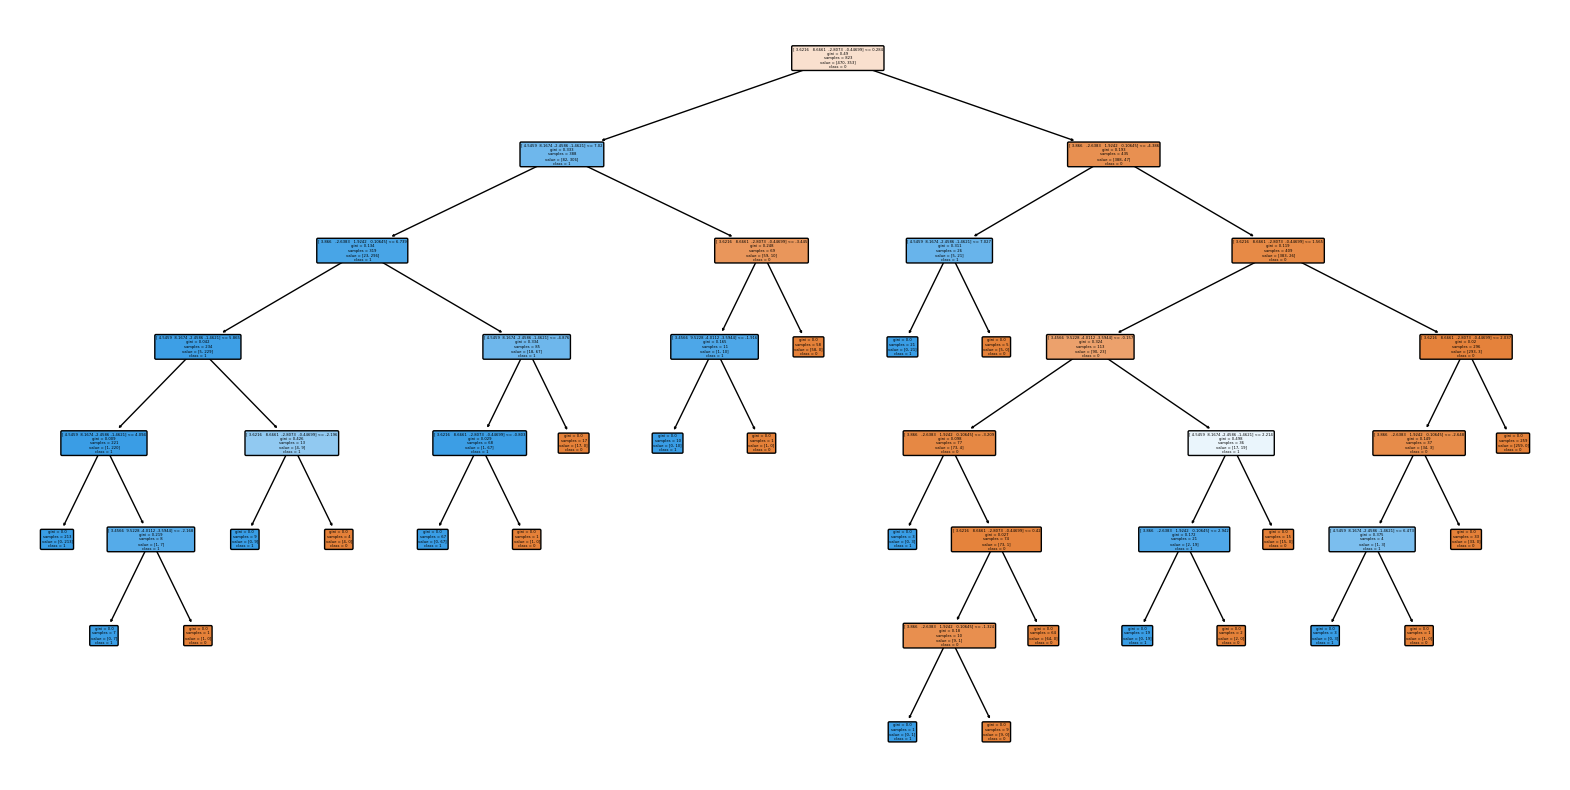

Min Auc = 96.97 , Max Auc = 99.47 , Mean Auc = 98.42
Min Node = 41 , Max Node = 53 , Mean Node = 47.0

In Case Of Train Size = 0.7


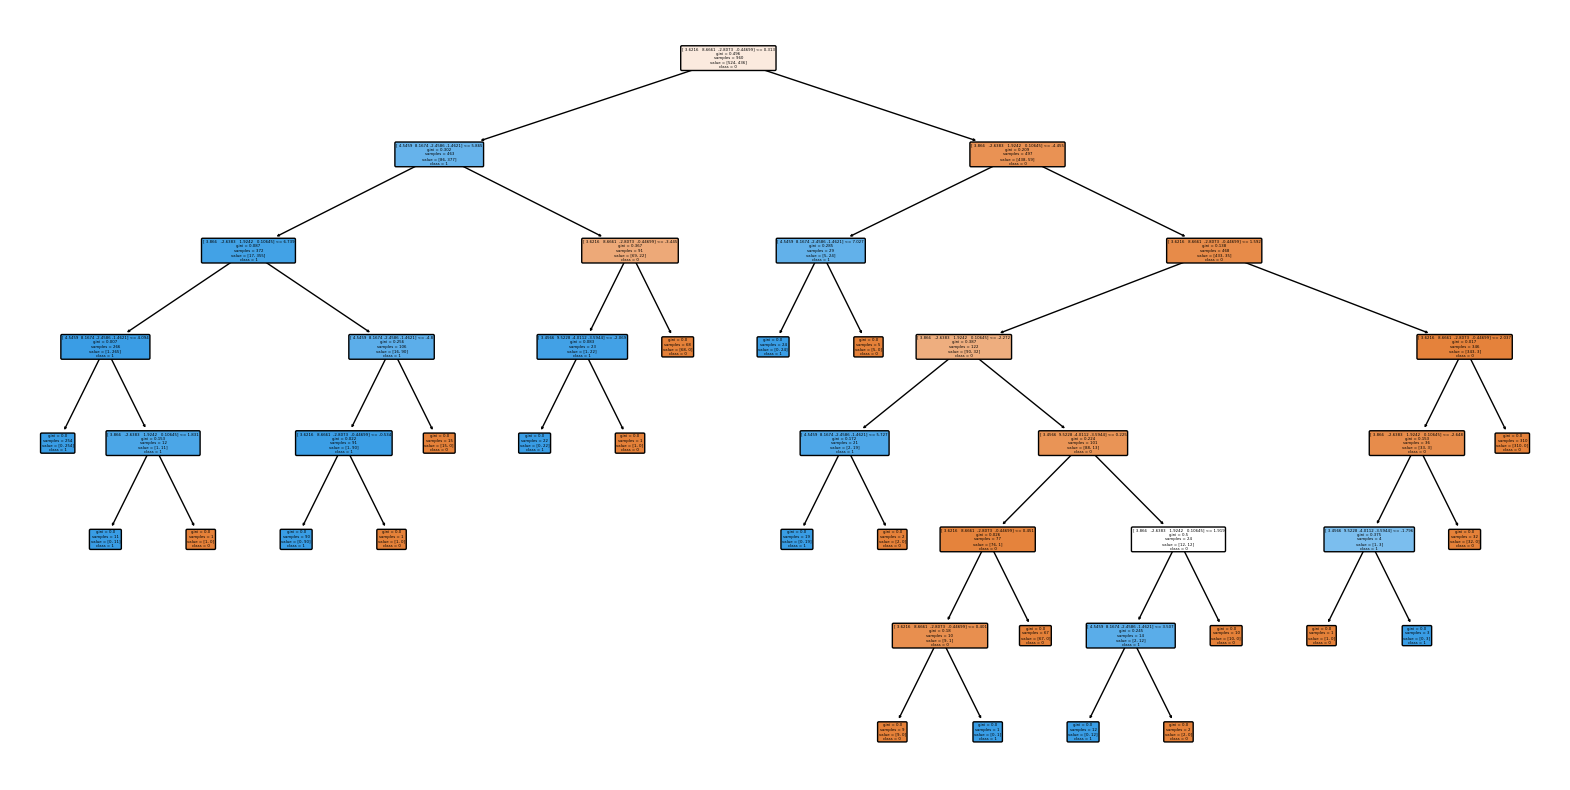

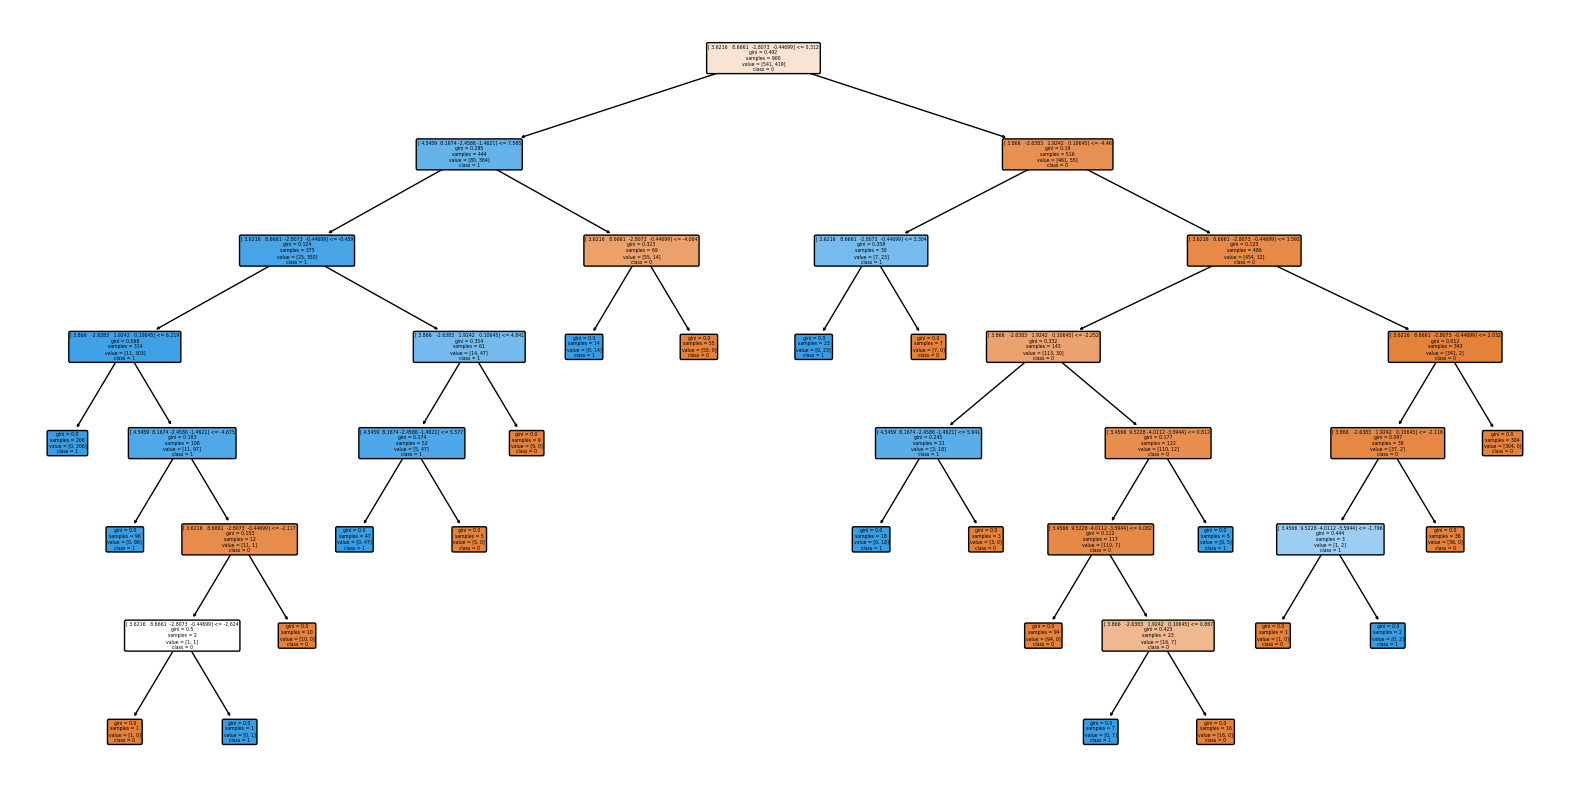

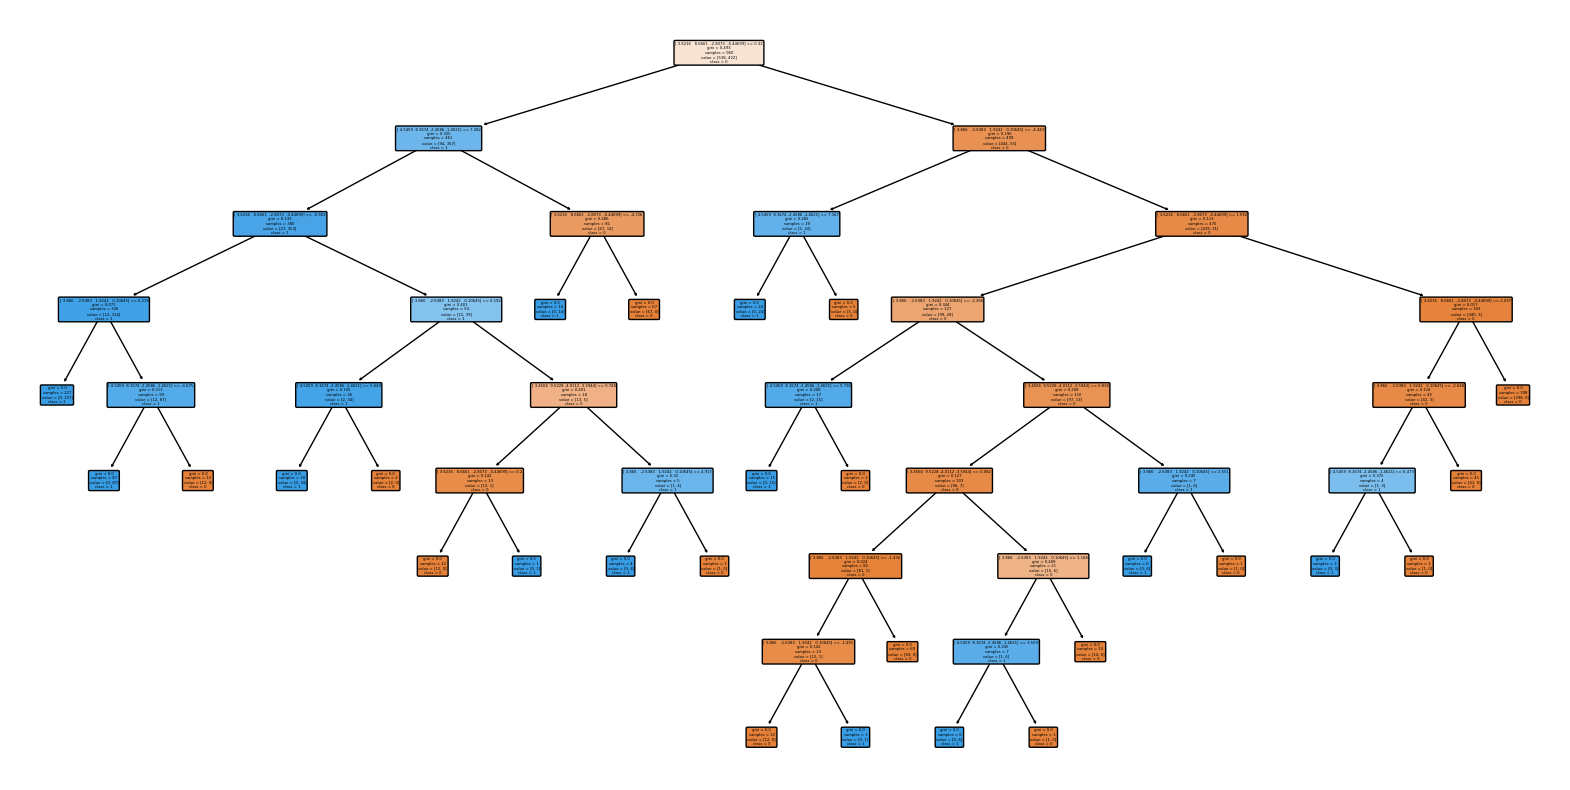

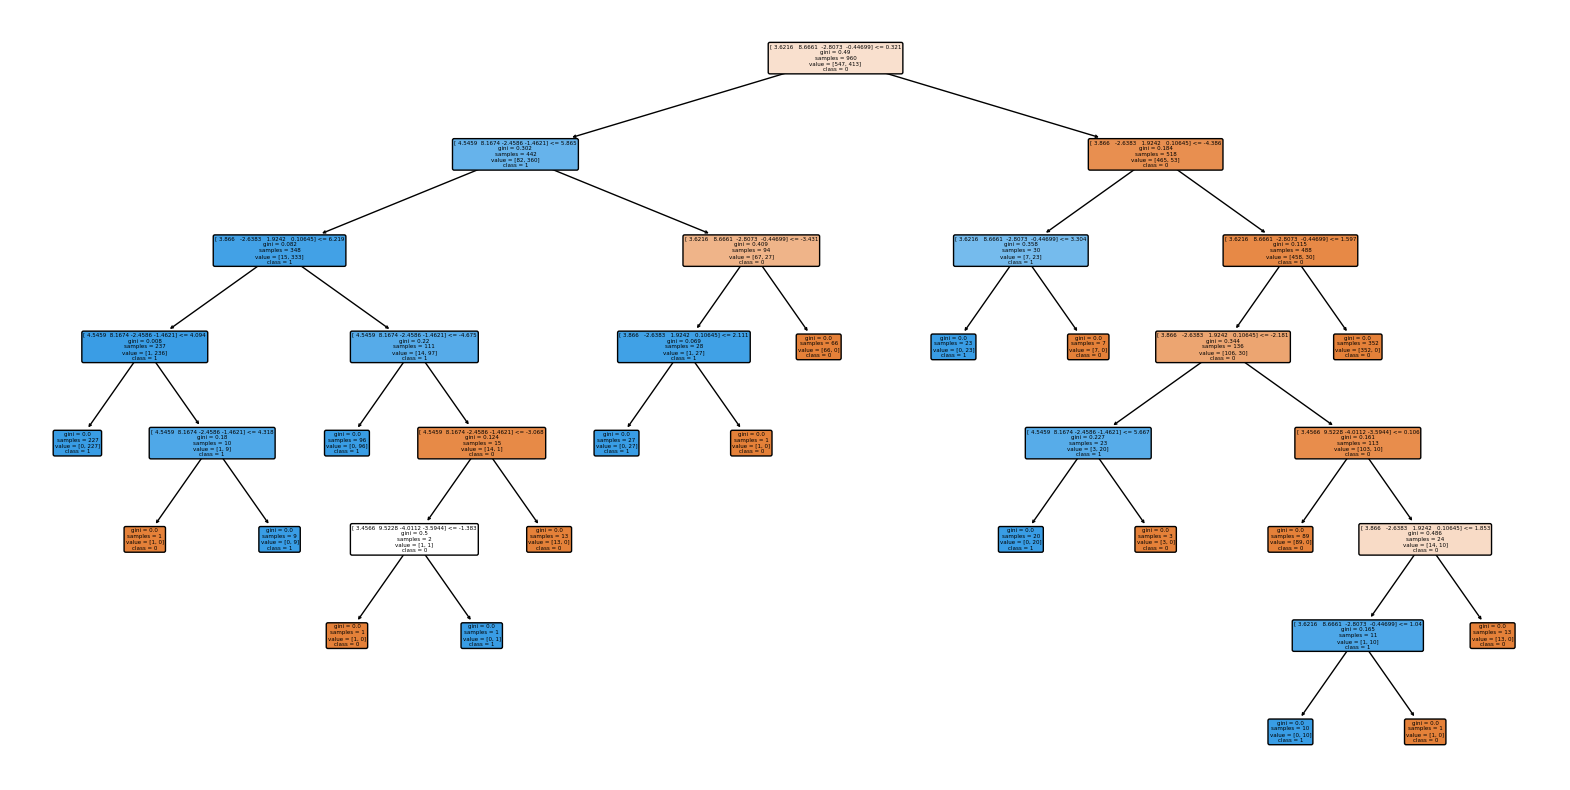

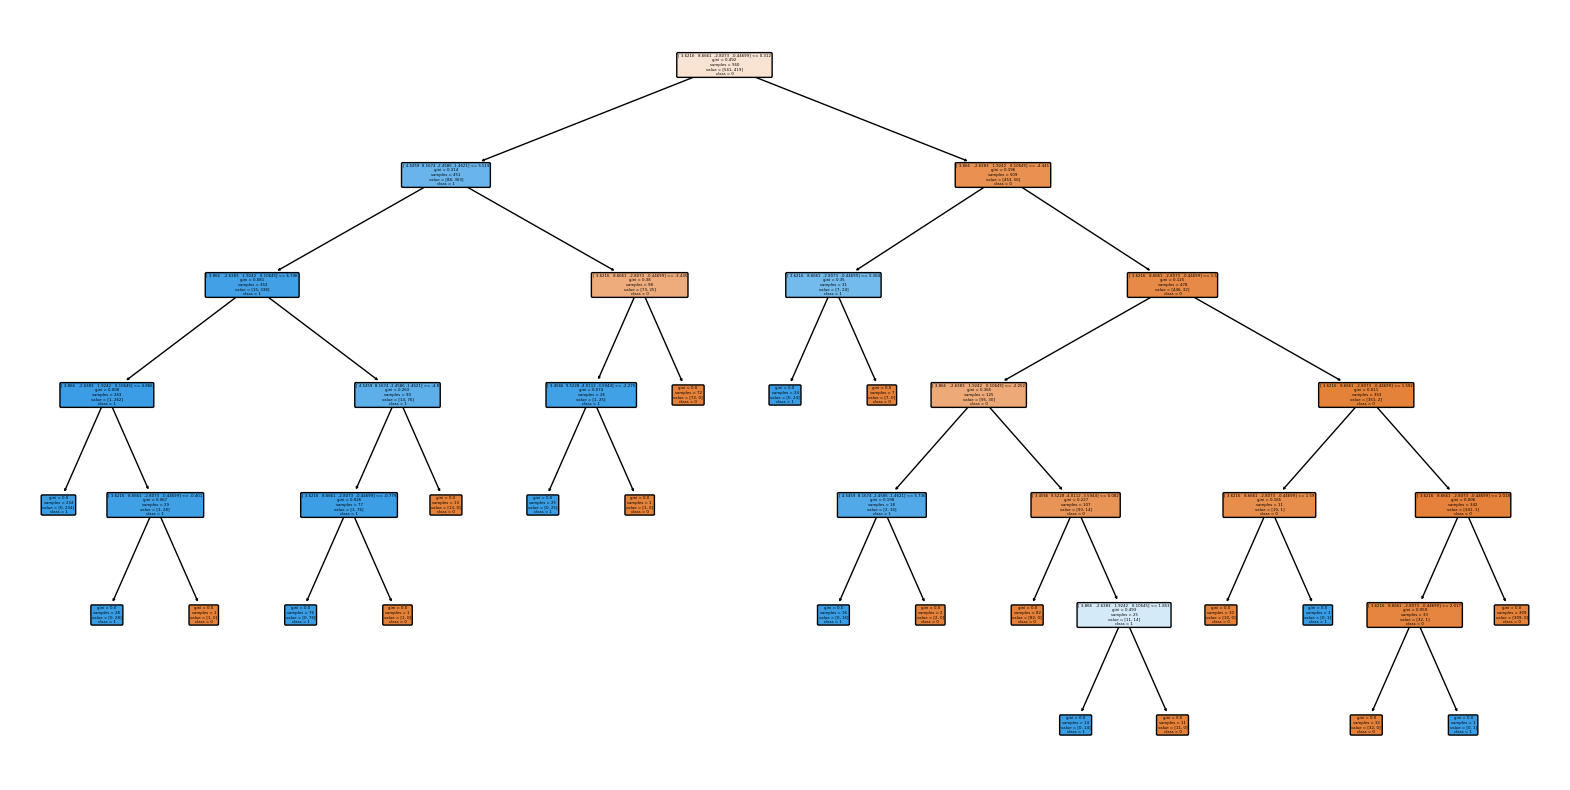

Min Auc = 97.5 , Max Auc = 98.8 , Mean Auc = 98.14
Min Node = 37 , Max Node = 53 , Mean Node = 43.8



In [7]:
pltArrayAuc= []
pltArraySize= []
minAuc = []
maxAuc = [] 
meanAuc = []
minNode = []
maxNode = [] 
meanNode = []
testSize = [0.7,0.6,0.5,0.4,0.3]

for j in testSize:
    
    print("In Case Of Train Size = " + str(round((1-j),1)))
    AUC_Array=[]            #Array for  AUC
    NODES_Array=[]          #Array for Nodes

    for i in range(5):
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=j)
        X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

        model_tree = DecisionTreeClassifier()
        model_tree.fit(X_train, y_train)

        #y_train_pred = model_tree.predict(X_train)
        y_valid_pred = model_tree.predict(X_valid)
        #auc_train = metrics.roc_auc_score(y_train, y_train_pred)
        auc_valid = metrics.roc_auc_score(y_valid, y_valid_pred)

        from sklearn.tree import plot_tree

        #Create the figure
        plt.figure(figsize=(20,10))

        #Create the tree plot
        plot_tree(model_tree,
                feature_names = X, #Feature names
                class_names = ["0","1"], #Class names
                rounded = True,
                filled = True)

        plt.show()

        AUC_Array.append(auc_valid)
        NODES_Array.append(model_tree.tree_.node_count)
        
        # print("AUC Valid = {} , Size of Tree = {}".format(round(auc_valid,2),model_tree.tree_.node_count))
        
    pltArrayAuc.append(np.mean(AUC_Array)*100)
    pltArraySize.append(np.mean(NODES_Array))
    #pltArraySize.append(NODES_Array[4])
    print(f"Min Auc = {round(np.min(AUC_Array)*100,2)} , Max Auc = {round(np.max(AUC_Array)*100,2)} , Mean Auc = {round(np.mean(AUC_Array)*100,2)}")
    print(f"Min Node = {np.min(NODES_Array)} , Max Node = {np.max(NODES_Array)} , Mean Node = {np.mean(NODES_Array)}\n")
    # print("AUC Valid = {} , Size of Tree = {}".format(round(auc_valid,2),model_tree.tree_.node_count))
        
    minAuc.append(round(np.min(AUC_Array)*100,2))
    maxAuc.append(round(np.max(AUC_Array)*100,2))
    meanAuc.append(round(np.mean(AUC_Array)*100,2))
    minNode.append(np.min(NODES_Array))
    maxNode.append(np.max(NODES_Array))
    meanNode.append(np.mean(NODES_Array))

## Create Report Table

In [8]:
sizeRange = ['30%','40%','50%','60%','70%']
df = pd.DataFrame ({'Training_set_size': sizeRange,'Min_Accuracy': minAuc,'Max_Accuracy': maxAuc, 'Mean_Accuracy': meanAuc,
                   'Min_Tree Size': minNode,'Max_Tree Size':maxNode,'Mean_Tree Size':meanNode})
df

Training_set_size  Min_Accuracy  Max_Accuracy  Mean_Accuracy  Min_Tree Size  \
0               30%         96.91         98.22          97.41             27   
1               40%         96.36         98.19          97.60             31   
2               50%         97.48         98.66          97.95             37   
3               60%         96.97         99.47          98.42             41   
4               70%         97.50         98.80          98.14             37   

   Max_Tree Size  Mean_Tree Size  
0             43            36.2  
1             45            35.0  
2             43            39.8  
3             53            47.0  
4             53            43.8

# Plot_1 : (accuracy against training set size)

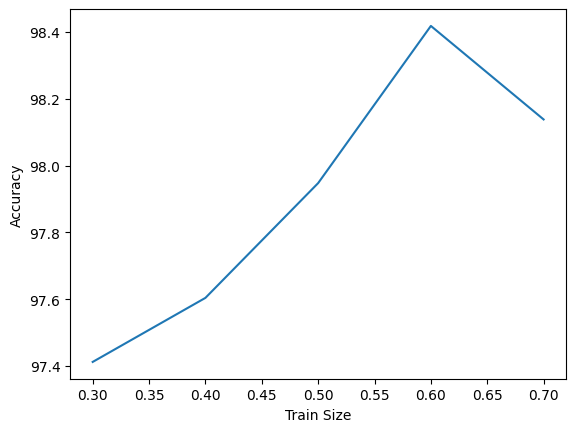

In [9]:
trainSize = [0.3,0.4,0.5,0.6,0.7]
plt.plot(trainSize,pltArrayAuc)

plt.xlabel("Train Size")
plt.ylabel("Accuracy")

plt.show()

# Plot_2 : (the number of nodes in the final tree against training set size)

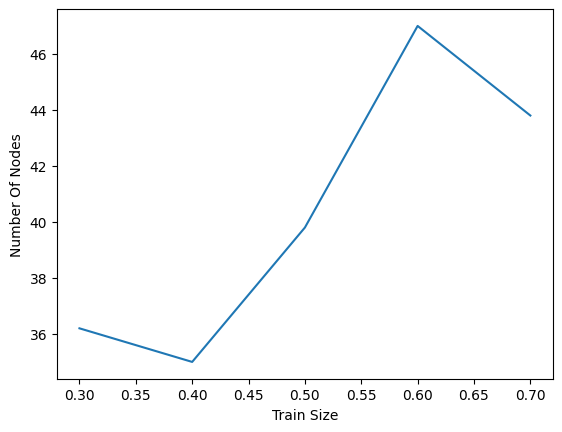

In [10]:
plt.plot(trainSize,pltArraySize)

plt.xlabel("Train Size")
plt.ylabel("Number Of Nodes")

plt.show()